# Korea Gas and Electricity | Comprehensive EDA

 ## Overview
 The goal of this EDA is to explore the relationship between gas and electricity usage in Korea, with regards to the temperature during each month of the year and the province/location within the country. Additionally, we will explore other factors that may be affected by this energy usage, such as air quality, as measured by pollutants and particulates present in the atmosphere.
 <br><br>
 We will explore 9 provinces and 7 'special cities' (특별시) in Korea over the time frame of 2000 - 2020: a total of 252 months.
 <br><br><u> The provinces are as follows:</u>
 <br> Gangwondo
<br> Gyeonggido
<br> Gyeongsangnamdo
<br> Gyeongsangbukdo
<br> Jeollanamdo
<br> Jeollabukdo
<br> Jeju
<br> Chungcheongnamdo
<br> Chungcheongbukdo
<br><br>
<u>As well as 7 Special Cities:</u>
<br> Seoul
<br> Incheon
<br> Gwangju
<br> Daegu
<br> Daejeon
<br> Busan
<br> Ulsan
 

## EDA
### Import: Data and relevant extensions

In [1]:
# Extensions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import date
%matplotlib inline

In [19]:
# Data
df = pd.read_excel('Data/Korea_Electricity_and_Gas.xlsx')

In [20]:
df.tail()

Year  Month  Temperature  Gangwondo_Elec  Gyeonggido_Elec  \
247  2020      8         27.0     2124.033292      6047.920142   
248  2020      9         21.4     2384.992068      6285.545956   
249  2020     10         14.9     1776.130300      5805.792953   
250  2020     11          9.0     1850.304954      5313.923434   
251  2020     12          0.8     1944.490212      4591.112244   

     Gyeongsangnamdo_Elec  Gyeongsangbukdo_Elec  Jeollanamdo_Elec  \
247           4042.533815           5491.141819       3642.636243   
248           3114.591872           7348.436329       4337.585202   
249           2895.362806           7572.486565       4352.367656   
250           3585.310849           7461.364848       4270.667493   
251           3544.662667           6976.895050       3504.775275   

     Jeollabukdo_Elec   Jeju_Elec  ...  Jeju_Gas  Chungcheongnamdo_Gas  \
247        852.167465  263.958548  ...      1506                 70181   
248        860.717918  342.911568  ...      1179                 86971   
249        615.960069  325.691095  ...      1414                109095   
250        940.002218  310.686307  ...      2161                142556   
251        795.419705  304.264909  ...      4220                198939   

     Chungcheongbukdo_Gas  Seoul_Gas  Incheon_Gas  Gwangju_Gas  Daegu_Gas  \
247                 49460     163032        70646        27561      45058   
248                 53589     147556        72542        28120      43042   
249                 61315     213556        78654        39428      44555   
250                 82499     375289       115663        58120      67054   
251                114597     636178       179536        94589     101139   

     Daejeon_Gas  Busan_Gas  Ulsan_Gas  
247        31906      70508      94251  
248        30307      70849     101433  
249        42001      85283     119332  
250        69624     122943     147792  
251       110897     200163     221037  

[5 rows x 35 columns]

Here, we can see there is the temperature(overall for the entire country) as well as the generated electricty and natural gas per region. I have also included the 'special cities' (특별시), which are considered separate from each province.
<br><br>
Electricity is measured in Gigawatt hours (GWh), Gas is measured in Normal Cubic Meters (Nm3), and Temperature in Celcius (C).

### Checking for Missing Values

In [4]:
df.isna().sum()

Year                      0
Month                     0
Temperature               0
Gangwondo_Elec           24
Gyeonggido_Elec          24
Gyeongsangnamdo_Elec     24
Gyeongsangbukdo_Elec     24
Jeollanamdo_Elec         24
Jeollabukdo_Elec         24
Jeju_Elec                24
Chungcheongnamdo_Elec    24
Chungcheongbukdo_Elec    24
Seoul_Elec               24
Incheon_Elec             24
Gwangju_Elec             24
Daegu_Elec               24
Daejeon_Elec             24
Busan_Elec               24
Ulsan_Elec               24
Gangwondo_Gas             0
Gyeonggido_Gas            0
Gyeongsangnamdo_Gas       0
Gyeongsangbukdo_Gas       0
Jeollanamdo_Gas           0
Jeollabukdo_Gas           0
Jeju_Gas                  0
Chungcheongnamdo_Gas      0
Chungcheongbukdo_Gas      0
Seoul_Gas                 0
Incheon_Gas               0
Gwangju_Gas               0
Daegu_Gas                 0
Daejeon_Gas               0
Busan_Gas                 0
Ulsan_Gas                 0
dtype: int64

In [6]:
df.head()

Year  Month  Temperature  Gangwondo_Elec  Gyeonggido_Elec  \
0  2000      1        -1.20             NaN              NaN   
1  2000      2        -0.99             NaN              NaN   
2  2000      3         6.64             NaN              NaN   
3  2000      4        12.11             NaN              NaN   
4  2000      5        17.59             NaN              NaN   

   Gyeongsangnamdo_Elec  Gyeongsangbukdo_Elec  Jeollanamdo_Elec  \
0                   NaN                   NaN               NaN   
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   

   Jeollabukdo_Elec  Jeju_Elec  ...  Jeju_Gas  Chungcheongnamdo_Gas  \
0               NaN        NaN  ...         0                 20158   
1               NaN        NaN  ...         0                 23492   
2               NaN        NaN  ...         0                 21156   
3               NaN        NaN  ...         0                 17447   
4               NaN        NaN  ...         0                 14508   

   Chungcheongbukdo_Gas  Seoul_Gas  Incheon_Gas  Gwangju_Gas  Daegu_Gas  \
0                 27838     662424       139454        39465      86077   
1                 27175     689177       145834        40674      84069   
2                 22904     566528       121324        34610      76144   
3                 16818     396231        91421        25898      62514   
4                 12299     262940        67239        18426      46992   

   Daejeon_Gas  Busan_Gas  Ulsan_Gas  
0        52992      85787      69241  
1        53950      87282      70910  
2        41898      74476      63627  
3        28618      58316      47106  
4        17503      45915      43749  

[5 rows x 35 columns]

We can see here that we are actually missing the first two years (24 months) of electrical data across the board. For now, we will just drop the values and start our analysis from the year 2002.

In [21]:
korea_data = df.dropna()
korea_data['DATE'] = pd.to_datetime(korea_data[['Year', 'Month']].assign(DAY=1))
korea_data.head()

Year  Month  Temperature  Gangwondo_Elec  Gyeonggido_Elec  \
24  2002      1         1.04     4114.162138     13942.479350   
25  2002      2         3.28      444.209358      1673.900665   
26  2002      3         8.15      285.982348      1311.206603   
27  2002      4        13.89      237.359806      1255.437126   
28  2002      5        18.07      239.106381      1175.540685   

    Gyeongsangnamdo_Elec  Gyeongsangbukdo_Elec  Jeollanamdo_Elec  \
24          48507.164290          49937.391610      43793.302280   
25           4203.778381           3960.269005       3542.160746   
26           3567.908104           4426.791474       2868.484153   
27           4283.508449           4845.066155       3023.488143   
28           4277.618093           3681.290064       3010.938166   

    Jeollabukdo_Elec    Jeju_Elec  ...  Chungcheongnamdo_Gas  \
24       1029.156074  1333.240947  ...                 39357   
25         56.614816   108.953851  ...                 34852   
26         68.429886    97.390591  ...                 32467   
27         85.461852   108.853700  ...                 27560   
28         55.178449   128.219171  ...                 23622   

    Chungcheongbukdo_Gas  Seoul_Gas  Incheon_Gas  Gwangju_Gas  Daegu_Gas  \
24                 30473     723439       162432        45615      88611   
25                 25755     647048       147925        40693      86216   
26                 22368     519039       130706        39172      72382   
27                 15377     376726       105653        29382      61988   
28                 13084     236489        80465        21698      52117   

    Daejeon_Gas  Busan_Gas  Ulsan_Gas       DATE  
24        59954     104771      88571 2002-01-01  
25        57008      85813      79743 2002-02-01  
26        47982      79998      71828 2002-03-01  
27        32359      60434      65519 2002-04-01  
28        22797      55696      60417 2002-05-01  

[5 rows x 36 columns]

### Initial Visualization
Let's take a look at how the data looks for electricity and gas, separated by region and time. We will focus on provinces first for now, so we'll use the 9 different province names!

In [22]:
# Separate into electricity and gas first
#locs = list(range(0,19)) + [35]
locs = list(range(0,12)) + [35]
elec = korea_data.iloc[:,locs]
elec.head()

Year  Month  Temperature  Gangwondo_Elec  Gyeonggido_Elec  \
24  2002      1         1.04     4114.162138     13942.479350   
25  2002      2         3.28      444.209358      1673.900665   
26  2002      3         8.15      285.982348      1311.206603   
27  2002      4        13.89      237.359806      1255.437126   
28  2002      5        18.07      239.106381      1175.540685   

    Gyeongsangnamdo_Elec  Gyeongsangbukdo_Elec  Jeollanamdo_Elec  \
24          48507.164290          49937.391610      43793.302280   
25           4203.778381           3960.269005       3542.160746   
26           3567.908104           4426.791474       2868.484153   
27           4283.508449           4845.066155       3023.488143   
28           4277.618093           3681.290064       3010.938166   

    Jeollabukdo_Elec    Jeju_Elec  Chungcheongnamdo_Elec  \
24       1029.156074  1333.240947           64560.187030   
25         56.614816   108.953851            5298.546532   
26         68.429886    97.390591            4339.560429   
27         85.461852   108.853700            4694.627385   
28         55.178449   128.219171            4911.964272   

    Chungcheongbukdo_Elec       DATE  
24               8.808194 2002-01-01  
25               0.539968 2002-02-01  
26               0.164717 2002-03-01  
27               0.230607 2002-04-01  
28               0.824801 2002-05-01

In [23]:
# Gas
#locs = list(range(0,3)) + list(range(19,36))
locs = list(range(0,3)) + list(range(19,28)) + [35]
gas = korea_data.iloc[:,locs]
gas.tail()

Year  Month  Temperature  Gangwondo_Gas  Gyeonggido_Gas  \
247  2020      8         27.0          19076          255222   
248  2020      9         21.4          18822          243817   
249  2020     10         14.9          25946          339823   
250  2020     11          9.0          35632          497221   
251  2020     12          0.8          57301          742863   

     Gyeongsangnamdo_Gas  Gyeongsangbukdo_Gas  Jeollanamdo_Gas  \
247                60523                84646            49039   
248                65264                88652            54253   
249                75071               103757            60416   
250               101609               135432            68793   
251               149527               183273            97863   

     Jeollabukdo_Gas  Jeju_Gas  Chungcheongnamdo_Gas  Chungcheongbukdo_Gas  \
247            43885      1506                 70181                 49460   
248            48190      1179                 86971                 53589   
249            61328      1414                109095                 61315   
250            82360      2161                142556                 82499   
251           113880      4220                198939                114597   

          DATE  
247 2020-08-01  
248 2020-09-01  
249 2020-10-01  
250 2020-11-01  
251 2020-12-01

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Average Electricity Usage, by month, for each province

Let's take a look at the distribution of generated electricity from 2002 to 2020.

In [90]:
cols = []
for c in elec.columns:
    cols.append(c)
print(cols)

['Year', 'Month', 'Temperature', 'Gangwondo_Elec', 'Gyeonggido_Elec', 'Gyeongsangnamdo_Elec', 'Gyeongsangbukdo_Elec', 'Jeollanamdo_Elec', 'Jeollabukdo_Elec', 'Jeju_Elec', 'Chungcheongnamdo_Elec', 'Chungcheongbukdo_Elec', 'DATE']


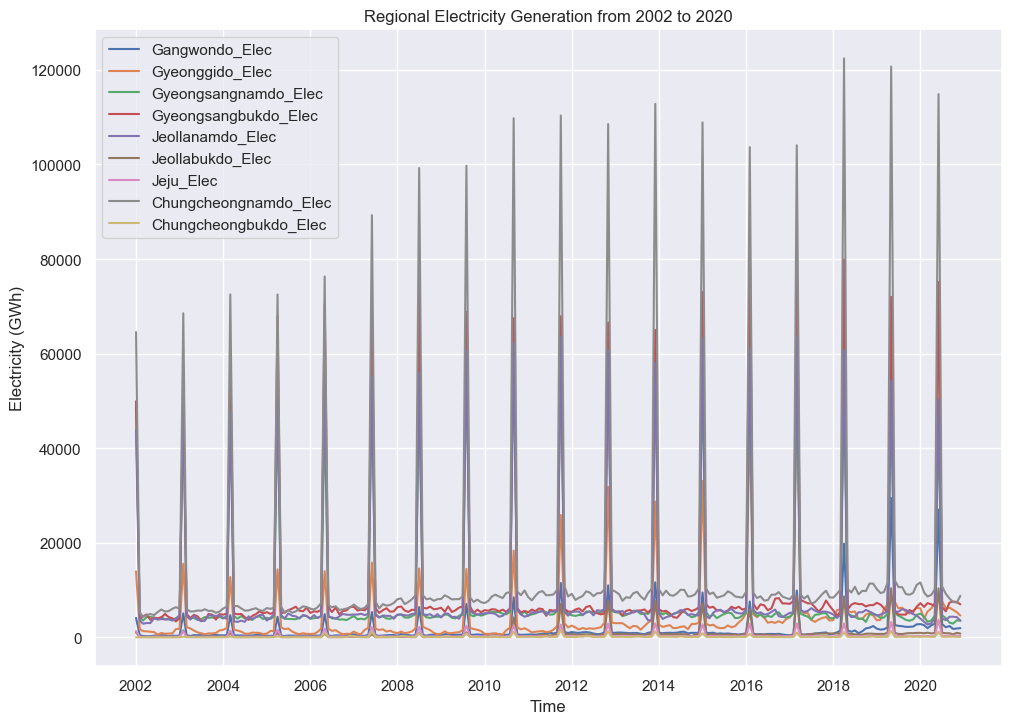

In [93]:
for i in range(3,12):
    plt.plot(elec['DATE'], elec.iloc[:,i], label=cols[i])
plt.legend()
plt.title('Regional Electricity Generation from 2002 to 2020')
plt.ylabel('Electricity (GWh)')
plt.xlabel('Time');

We can see here that despite fluctuating in very regular intervals per year, the magnitude of each year differs greatly in different provinces. Also, the scale of generated electricity varies greatly between provinces. 
<br><br>
For ease of viewing, let's also graph each province invidually.

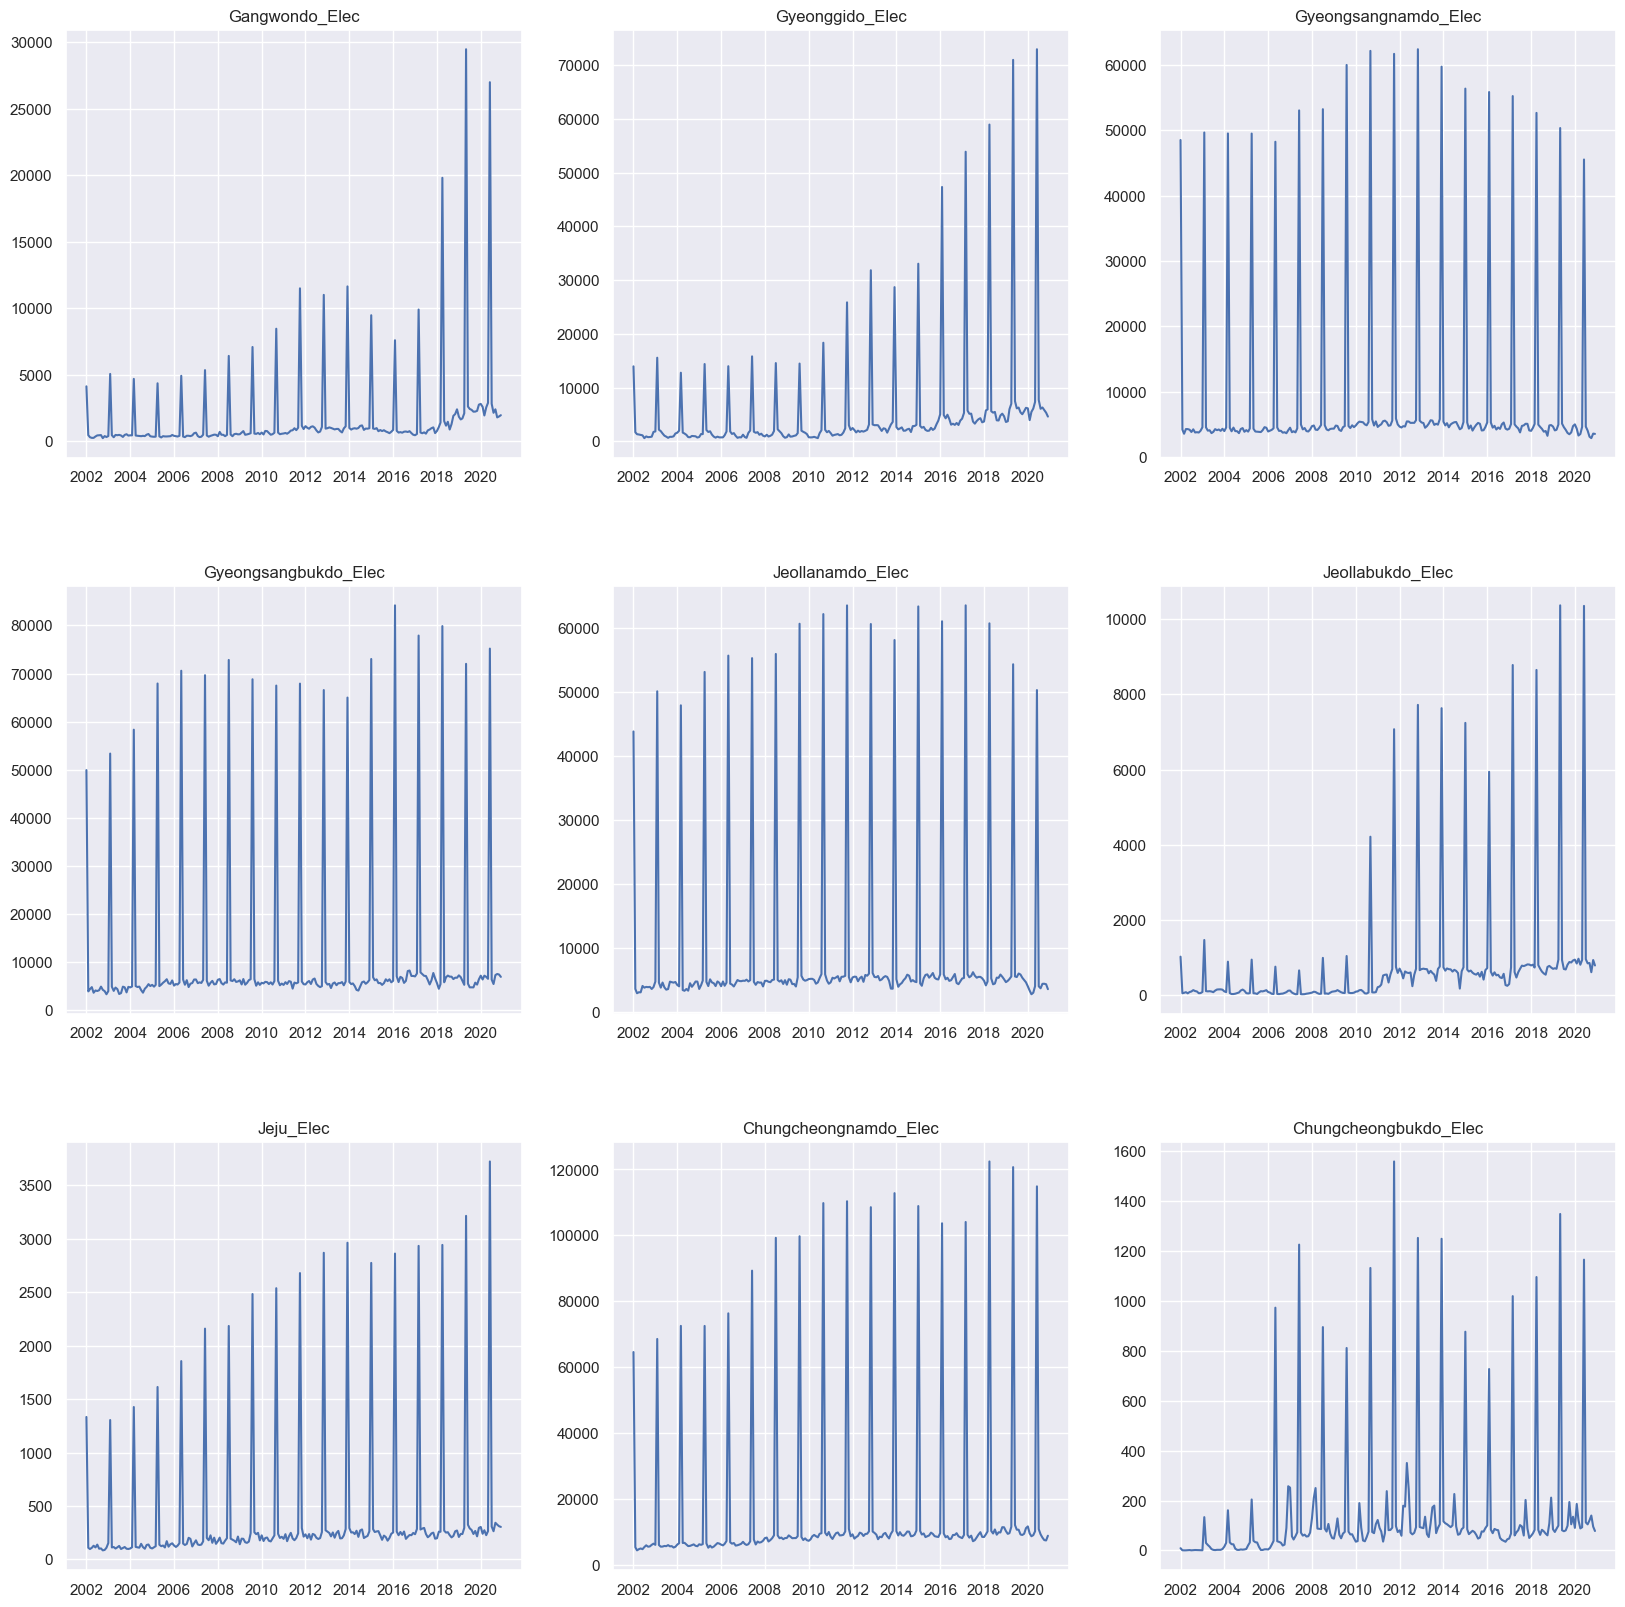

In [19]:
cols2 = []
for i in range (3,12):
    cols2.append(cols[i])

fig, axs = plt.subplots(3,3, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)

axs = axs.ravel()

for i in range(9):

    axs[i].plot(elec['DATE'], elec.iloc[:,i+3], label=cols2[i])
    axs[i].set_title(cols2[i])


Again, we can see that the data fluctuates greatly, with a great deal of variance (in some provinces especially). Visually, the fluctuations appear to happen regularly, but seems to shift forward from year to year. This could indicate *<b>more than a year per cycle of fluctuation</b>*. We can also see that the troughs are also steadily trending upwards as time goes by. We will keep this in mind when choosing a model!

In [94]:
elec.head(20)

Year  Month  Temperature  Gangwondo_Elec  Gyeonggido_Elec  \
24  2002      1         1.04     4114.162138     13942.479350   
25  2002      2         3.28      444.209358      1673.900665   
26  2002      3         8.15      285.982348      1311.206603   
27  2002      4        13.89      237.359806      1255.437126   
28  2002      5        18.07      239.106381      1175.540685   
29  2002      6        22.16      342.944343      1098.742644   
30  2002      7        25.14      422.307624       576.949910   
31  2002      8        24.31      430.103026       896.388665   
32  2002      9        21.52      445.964691       761.179648   
33  2002     10        13.41      217.691082       784.605893   
34  2002     11         4.79      372.229373       846.621541   
35  2002     12         2.43      301.690349      1737.120254   
36  2003      1        -1.74      374.573757      1824.785709   
37  2003      2         3.16     5047.765382     15549.852960   
38  2003      3         6.85      437.056373      2146.436702   
39  2003      4        13.37      285.871031      1882.907555   
40  2003      5        19.20      458.678208      1440.450693   
41  2003      6        21.50      438.363810      1034.757189   
42  2003      7        23.29      463.126560       854.163537   
43  2003      8        24.20      417.325605       634.588370   

    Gyeongsangnamdo_Elec  Gyeongsangbukdo_Elec  Jeollanamdo_Elec  \
24          48507.164290          49937.391610      43793.302280   
25           4203.778381           3960.269005       3542.160746   
26           3567.908104           4426.791474       2868.484153   
27           4283.508449           4845.066155       3023.488143   
28           4277.618093           3681.290064       3010.938166   
29           4182.686018           4148.315863       4006.839930   
30           3835.537257           4039.224177       3741.308195   
31           4242.488225           4205.766380       3855.131169   
32           3761.203565           4948.690502       3818.461929   
33           3804.702587           4285.164256       3860.178685   
34           3755.758887           4009.680729       3532.899210   
35           4027.649248           3364.593206       3835.950104   
36           4564.325473           4022.539800       4697.461847   
37          49654.711460          53372.311250      50068.406700   
38           4543.465515           4940.416575       4524.220338   
39           4040.988448           4061.878564       3743.994505   
40           4101.526194           4754.604963       4539.106620   
41           3665.890200           4433.964733       3781.612871   
42           3853.839417           3419.842434       3429.234544   
43           4272.402089           3596.062747       3519.497650   

    Jeollabukdo_Elec    Jeju_Elec  Chungcheongnamdo_Elec  \
24       1029.156074  1333.240947           64560.187030   
25         56.614816   108.953851            5298.546532   
26         68.429886    97.390591            4339.560429   
27         85.461852   108.853700            4694.627385   
28         55.178449   128.219171            4911.964272   
29         89.129755   112.285657            4701.518162   
30        103.845539   138.464039            5335.090355   
31        140.359334   100.341061            5872.373222   
32        115.506165   102.753645            5452.142010   
33        104.407974    84.803410            5538.609589   
34         57.780737    88.756740            6023.048252   
35         61.506230   109.317525            6373.870593   
36         90.935338   153.101556            6018.836233   
37       1472.353689  1304.559307           68534.026820   
38        114.033838   112.229295            5960.350429   
39        107.258808   116.155633            5456.385342   
40        112.135032   101.988431            5490.022650   
41        103.286887   113.245672            5676.552383   
42         85.635688   126.364630            5611.814661   
43       

Looking into the data, we can actually see that the peak electricity generation happens *<b>every 13 months</b>*.

### Average Gas Usage, by month, for each province

We will repeat the process, this time looking at the gas usage per province, over the course of 19 years.

In [95]:
cols = []
for c in gas.columns:
    cols.append(c)
print(cols)

['Year', 'Month', 'Temperature', 'Gangwondo_Gas', 'Gyeonggido_Gas', 'Gyeongsangnamdo_Gas', 'Gyeongsangbukdo_Gas', 'Jeollanamdo_Gas', 'Jeollabukdo_Gas', 'Jeju_Gas', 'Chungcheongnamdo_Gas', 'Chungcheongbukdo_Gas', 'DATE']


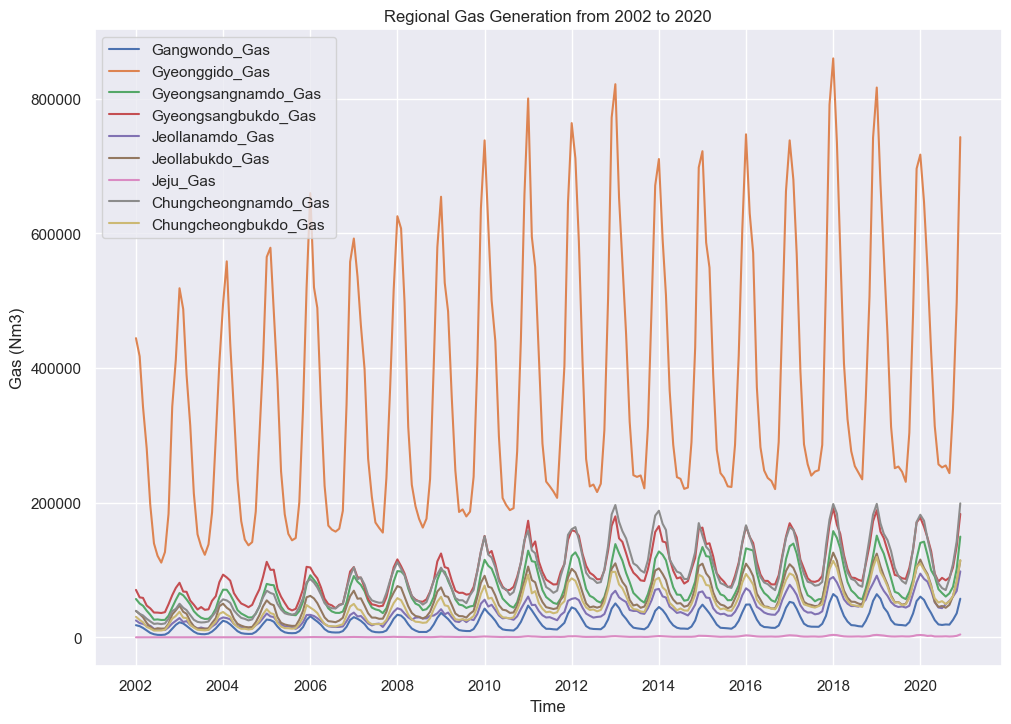

In [17]:
for i in range(3,12):
    plt.plot(gas['DATE'], gas.iloc[:,i], label=cols[i])
plt.legend()
plt.title('Regional Gas Generation from 2002 to 2020')
plt.ylabel('Gas (Nm3)')
plt.xlabel('Time');

Wow! The gas data looks much cleaner, but still has similar yearly fluctuations in generation. We can see here that the province, 'Gyeonggido', uses much more gas than the other provinces. This makes sense, as it is the most populated province in Korea.

In [23]:
cols2 = []
for i in range (3,12):
    cols2.append(cols[i])

fig, axs = plt.subplots(3,3, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)

axs = axs.ravel()

for i in range(9):

    axs[i].plot(gas['DATE'], gas.iloc[:,i+3], label=cols2[i])
    axs[i].set_title(cols2[i])

Checking the data again to see when the peaks happen:

In [96]:
gas.head(20)

Year  Month  Temperature  Gangwondo_Gas  Gyeonggido_Gas  \
24  2002      1         1.04          18001          444297   
25  2002      2         3.28          16547          417268   
26  2002      3         8.15          13898          342306   
27  2002      4        13.89          10149          280578   
28  2002      5        18.07           6541          196282   
29  2002      6        22.16           4567          139388   
30  2002      7        25.14           3641          121043   
31  2002      8        24.31           3504          110926   
32  2002      9        21.52           3969          126622   
33  2002     10        13.41           6818          183247   
34  2002     11         4.79          12737          342573   
35  2002     12         2.43          18513          412328   
36  2003      1        -1.74          22285          518398   
37  2003      2         3.16          20582          487404   
38  2003      3         6.85          16946          389952   
39  2003      4        13.37          12548          314540   
40  2003      5        19.20           8386          213745   
41  2003      6        21.50           5543          152922   
42  2003      7        23.29           4754          135018   
43  2003      8        24.20           4598          122540   

    Gyeongsangnamdo_Gas  Gyeongsangbukdo_Gas  Jeollanamdo_Gas  \
24                56890                70413            25014   
25                50189                59324            21067   
26                46879                58515            19969   
27                39471                47116            17025   
28                33363                42949            17139   
29                26117                36784            12624   
30                26563                36678            12150   
31                25748                36088            12038   
32                25833                37373            10699   
33                32127                49095            14849   
34                44368                62549            20484   
35                55590                73365            24469   
36                65706                80975            28606   
37                62385                67966            22712   
38                56372                67514            24030   
39                48584                54531            18438   
40                38828                48380            15298   
41                33089                41258            13005   
42                29106                44898            14523   
43                27239                40776            12951   

    Jeollabukdo_Gas  Jeju_Gas  Chungcheongnamdo_Gas  Chungcheongbukdo_Gas  \
24            39060         0                 39357                 30473   
25            34579         0                 34852                 25755   
26            29838         0                 32467                 22368   
27            21297         0                 27560                 15377   
28            15558         0                 23622                 13084   
29            11863         0                 19939                  9982   
30            13412         0                 20464                 10091   
31            12927         0                 19628                 10160   
32            13057         0                 20602                 11203   
33            20202         0                 27685                 18329   
34            33937         0                 38808                 27646   
35            40070         0                 42242                 31764   
36            47209         0                 49881                 37927   
37            37936         0                 43850                 29180   
38            34934         0                 40321                 28618   
39            23635         0                 33048                 18415   
40   

And in this case, the peaks follow a more regular pattern, happening *<b>every year during the cold months, around October to March.</b>*

## Initial Takeaway

Let look back on what we've been able to glean from the information so far: <br>
1. Both the electricity and gas data show regular patterns of fluctuation based on consumption. <br>
2. The *<b>electricity usage hits a peak every 13 months</b>* (which is a bit strange, as it doesn't seem to follow seasons, but instead follows a consistent cycle)<br> 
3. The *<b>gas usage peaks in colder weather</b>* (around October to March) every year. <br> 
4. Both datasets show an upward trend of generation as time goes on.

Since we had a clear pattern of gas usage and time of year, let's also explore the relationship between the weather during these times and the gas usage.
<br><br>
Here, I will explore the relationship between gas usage in Gyeonggido (as it has the biggest scale of gas use of the provinces), and import a more detailed weather dataset that has specific values for each region in Korea.

In [25]:
# Import weather dataset
weather_df = pd.read_excel('Data/Weather.xlsx')

# Dataset contains data from 2000 onwards, and we only need from 2002.
weather_df = weather_df.iloc[24:,:].reset_index()
weather_df.head()

index  Year  Month  Overall  Gangwondo  Gyeonggido  Gyeongsamnamdo  \
0     24  2002      1     1.04       -2.8         0.3             4.6   
1     25  2002      2     3.28        0.5         2.9             6.1   
2     26  2002      3     8.15        7.1         7.6            10.6   
3     27  2002      4    13.89       13.2        13.6            14.9   
4     28  2002      5    18.07       17.9        18.2            18.0   

   Gyeongsambukdo  Jeollanamdo  Jeollabukdo  Jeju Chungcheongnamdo  \
0             3.8          2.9          3.1   7.7                -   
1             5.6          3.4          2.8   7.3                -   
2            10.3          8.7          8.2  11.4                -   
3            14.9         14.4         14.2  15.2                -   
4            17.1         18.1         17.6  17.4                -   

   Chungcheongbukdo  Seoul  Incheon  Gwangju  Daegu  Daejeon  Busan  Ulsan  
0               0.7    0.3      0.8      2.9    2.3      1.7    4.8    4.5  
1               1.7    2.9      2.7      3.4    4.0      2.4    6.6    5.8  
2               8.1    7.6      7.6      8.7   10.1      8.6   10.7   10.5  
3              14.4   13.6     13.7     14.4   15.6     14.8   14.4   14.8  
4              18.1   18.2     17.5     18.1   18.5     18.1   17.0   17.4

Here, we will just use the data from Gyeonggido to explore the relationship between temperature and gas usage. We should expect the gas usage to be *more in colder weather and less in warmer weather!*

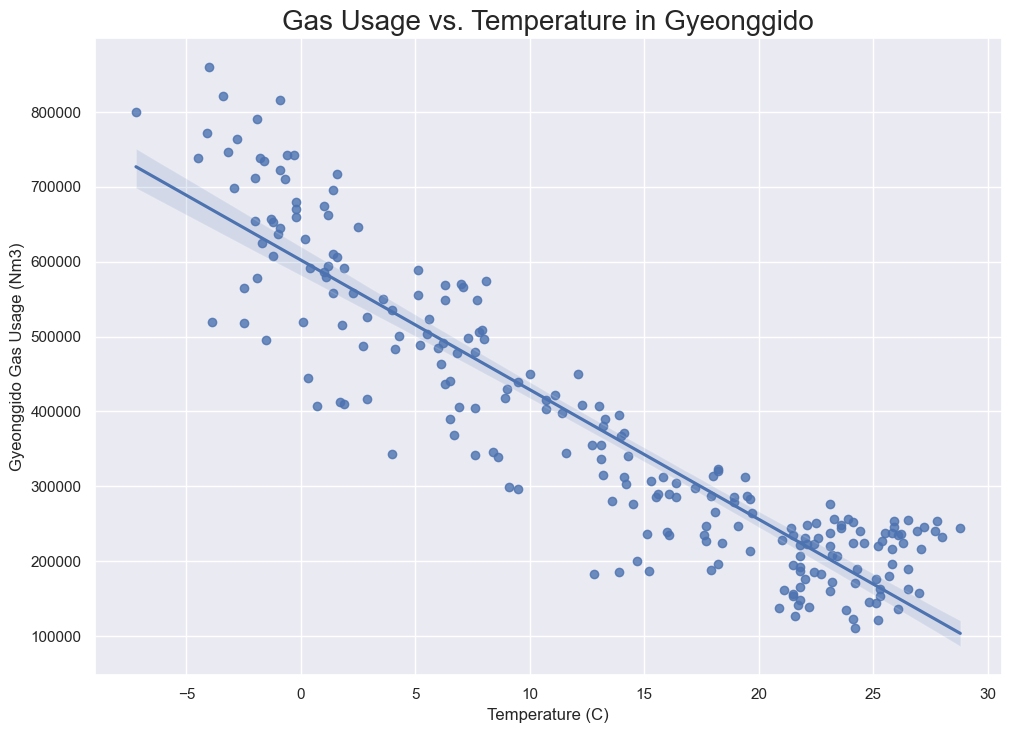

In [99]:
# Plot temperature vs. gas usage
sns.regplot(y=gas['Gyeonggido_Gas'], x=weather_df.Gyeonggido)
plt.ylabel('Gyeonggido Gas Usage (Nm3)')
plt.xlabel('Temperature (C)')
plt.title('Gas Usage vs. Temperature in Gyeonggido', size=20);

### As expected, there is a strong linear relationship between gas usage and temperature in the region.
This is valueable to know, and we can consider this relationship later when designing a model to predict gas usage based on temperature or vice versa.
<br><b>Note:</b> There are some missing values in the temperature data, so we will need to clean it up before using it on all of the regions/cities.

## Additional Data: air quality (fine dust particulates)
We will also explore the relationship between weather, resource usage, and the presence of fine dust. 
<br>The fine dust explored in this EDA refers to PM10 particulates, indicating that the particulates will be less than or equal to 10 microns in diameter. The impact of fine dust is especially widespread in South Korea, and is a key health issue for the current population. 

In [26]:
# Import the fine dust data and take a look:
dust_df = pd.read_csv('Data/FineDust_PM10__by_Month_and_Province.csv')
dust_df

Period  Gyeonggi  Gangwon  Chungbuk  Chungnam  Jeonbuk  Jeonnam  \
0    2010.01        68       62        77        45       55       46   
1    2010.02        56       55        62        40       47       40   
2    2010.03        67       70        73        57       62       58   
3    2010.04        57       58        63        47       52       39   
4    2010.05        66       60        67        52       66       51   
..       ...       ...      ...       ...       ...      ...      ...   
150  2022.07        25       18        23        25       23       20   
151  2022.08        20       16        17        19       18       17   
152  2022.09        24       16        20        25       25       21   
153  2022.10        29       17        26        33       31       21   
154  2022.11        44       31        44        46       43       30   

     Gyeongbuk  Gyeongnam  Jeju Special Self-governing Province  
0           50         45                                    54  
1           47         42                                    41  
2           62         61                                    71  
3           48         45                                    47  
4           54         52                                    58  
..         ...        ...                                   ...  
150         20         21                                    20  
151         18         19                                    18  
152         21         20                                    28  
153         24         21                                    26  
154         39         31                                    30  

[155 rows x 10 columns]

We see that the data on dust particulates spans the time frame of 2010 to November 2022. Since our other data only goes until 2020, we will <b>remove the dates past 2020 and before 2010</b> for this data exploration.

In [27]:
# Fix weather dataframe to be after 2010
weather_df_2010 = weather_df.copy().drop(columns='index')
weather_df_2010 = weather_df_2010[weather_df_2010.Year > 2009].reset_index()
weather_df_2010

index  Year  Month  Overall  Gangwondo  Gyeonggido  Gyeongsamnamdo  \
0       96  2010      1    -2.88       -6.5        -4.5             2.2   
1       97  2010      2     2.32       -0.1         1.4             5.1   
2       98  2010      3     5.25        3.8         4.3             7.9   
3       99  2010      4    10.06        9.2         9.5            11.4   
4      100  2010      5    17.53       17.2        17.2            17.7   
..     ...   ...    ...      ...        ...         ...             ...   
127    223  2020      8    27.00       26.1        26.5            27.5   
128    224  2020      9    21.40       19.7        21.4            21.5   
129    225  2020     10    14.90       11.9        14.3            16.0   
130    226  2020     11     9.00        6.1         8.0            10.7   
131    227  2020     12     0.80       -2.7        -0.3             2.6   

     Gyeongsambukdo  Jeollanamdo  Jeollabukdo  Jeju Chungcheongnamdo  \
0               1.8          0.5         -0.8   5.3                -   
1               5.0          4.4          3.2   7.3                -   
2               7.4          7.4          6.3   9.3                -   
3              11.5         11.2         10.3  11.8                -   
4              18.2         18.6         18.0  17.3                -   
..              ...          ...          ...   ...              ...   
127            28.6         27.6         27.7  29.4             26.8   
128            21.6         21.3         21.3  22.9             20.7   
129            16.4         15.7         14.9  18.4             13.2   
130            11.3         10.5          9.6  14.1              8.1   
131             3.3          2.7          1.7   7.7              0.3   

     Chungcheongbukdo  Seoul  Incheon  Gwangju  Daegu  Daejeon  Busan  Ulsan  
0                -3.2   -4.5     -3.2      0.5    0.0     -2.7    3.0    1.5  
1                 2.1    1.4      1.7      4.4    3.9      2.1    5.8    4.4  
2                 5.3    4.3      5.1      7.4    6.9      5.3    7.8    7.0  
3                10.4    9.5      9.6     11.2   11.5     10.0   11.5   10.8  
4                18.5   17.2     16.1     18.6   19.4     17.8   17.2   17.6  
..                ...    ...      ...      ...    ...      ...    ...    ...  
127              27.7   26.5     25.9     27.6   28.6     27.5   27.2   27.6  
128              21.5   21.4     21.3     21.3   21.2     21.2   21.9   21.1  
129              14.5   14.3     14.8     15.7   15.4     14.2   17.3   15.9  
130               8.8    8.0      8.3     10.5    9.7      8.6   12.4   11.0  
131               0.4   -0.3      0.2      2.7    1.6      0.5    4.3    3.4  

[132 rows x 20 columns]

In [28]:
# Fix gas df to be after 2010
gas_2010 = gas[gas.Year > 2009].reset_index()
gas_2010

index  Year  Month  Temperature  Gangwondo_Gas  Gyeonggido_Gas  \
0      120  2010      1        -2.88          42634          738025   
1      121  2010      2         2.32          36126          610984   
2      122  2010      3         5.25          31185          500288   
3      123  2010      4        10.06          24563          439879   
4      124  2010      5        17.53          16210          298335   
..     ...   ...    ...          ...            ...             ...   
127    247  2020      8        27.00          19076          255222   
128    248  2020      9        21.40          18822          243817   
129    249  2020     10        14.90          25946          339823   
130    250  2020     11         9.00          35632          497221   
131    251  2020     12         0.80          57301          742863   

     Gyeongsangnamdo_Gas  Gyeongsangbukdo_Gas  Jeollanamdo_Gas  \
0                 115062               150557            55869   
1                 106227               124237            45638   
2                 101967               128170            48303   
3                  88237               109090            40528   
4                  71382                86966            32410   
..                   ...                  ...              ...   
127                60523                84646            49039   
128                65264                88652            54253   
129                75071               103757            60416   
130               101609               135432            68793   
131               149527               183273            97863   

     Jeollabukdo_Gas  Jeju_Gas  Chungcheongnamdo_Gas  Chungcheongbukdo_Gas  \
0              91374      1277                150098                 76881   
1              75053      1011                122722                 57384   
2              73523       876                118461                 58705   
3              62172       700                104033                 48017   
4              47875       436                 83359                 35268   
..               ...       ...                   ...                   ...   
127            43885      1506                 70181                 49460   
128            48190      1179                 86971                 53589   
129            61328      1414                109095                 61315   
130            82360      2161                142556                 82499   
131           113880      4220                198939                114597   

          DATE  
0   2010-01-01  
1   2010-02-01  
2   2010-03-01  
3   2010-04-01  
4   2010-05-01  
..         ...  
127 2020-08-01  
128 2020-09-01  
129 2020-10-01  
130 2020-11-01  
131 2020-12-01  

[132 rows x 14 columns]

In [29]:
# Fix dust df to be before 2021
dust_df_2010 = dust_df[dust_df.Period < 2021.01]
dust_df_2010

Period  Gyeonggi  Gangwon  Chungbuk  Chungnam  Jeonbuk  Jeonnam  \
0    2010.01        68       62        77        45       55       46   
1    2010.02        56       55        62        40       47       40   
2    2010.03        67       70        73        57       62       58   
3    2010.04        57       58        63        47       52       39   
4    2010.05        66       60        67        52       66       51   
..       ...       ...      ...       ...       ...      ...      ...   
127  2020.08        24       19        21        24       22       28   
128  2020.09        22       18        22        24       23       22   
129  2020.10        38       28        36        39       35       28   
130  2020.11        45       34        41        42       36       29   
131  2020.12        46       36        44        42       36       28   

     Gyeongbuk  Gyeongnam  Jeju Special Self-governing Province  
0           50         45                                    54  
1           47         42                                    41  
2           62         61                                    71  
3           48         45                                    47  
4           54         52                                    58  
..         ...        ...                                   ...  
127         23         29                                    29  
128         22         24                                    26  
129         31         29                                    31  
130         36         30                                    28  
131         36         30                                    24  

[132 rows x 10 columns]

### Check for missing values in dust_df

In [104]:
dust_df_2010.isnull().sum()

Period                                  0
Gyeonggi                                0
Gangwon                                 0
Chungbuk                                0
Chungnam                                0
Jeonbuk                                 0
Jeonnam                                 0
Gyeongbuk                               0
Gyeongnam                               0
Jeju Special Self-governing Province    0
dtype: int64

Looks clean! Let's move on.

### Now that the dataframes are ready, let's compare the dust particulate amount to both temperature and gas usage. 
For the sake of continuity, we will continue to look at the Gyeonggido province.

In [24]:
# Temperature:
sns.scatterplot(x=weather_df_2010.Gyeonggido, y=dust_df_2010.Gyeonggi)
plt.ylabel('Fine Dust Particulate PM10 (ug/m3)')
plt.xlabel('Temperature(C)')
plt.title('Exploring the Relationship Between Temperature and Fine Dust', size=20);

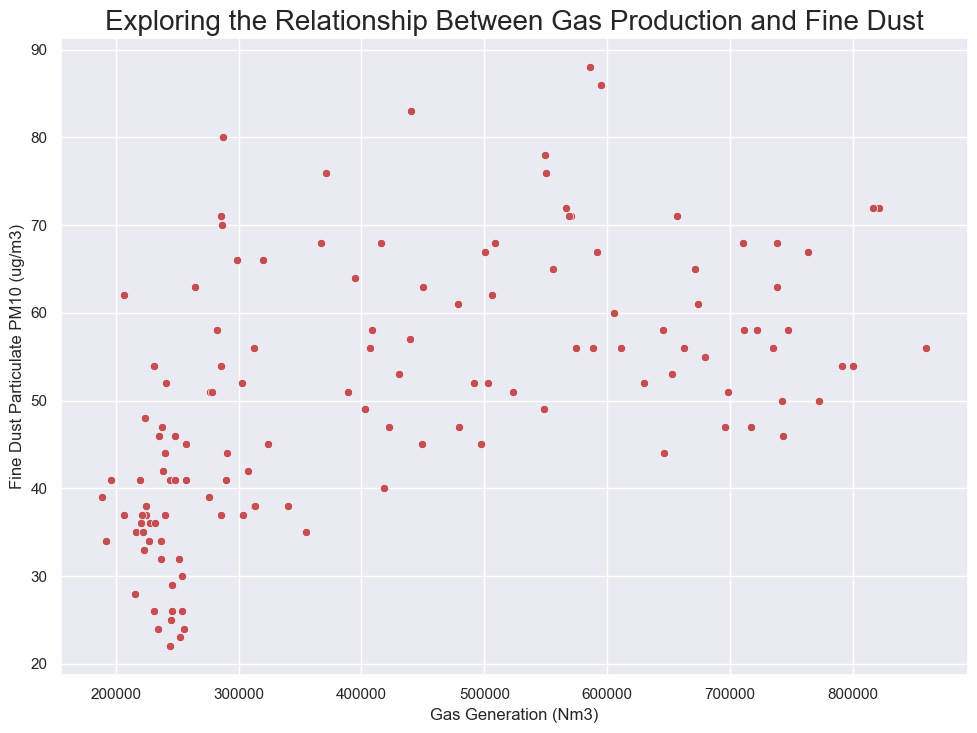

In [25]:
# Gas usage
sns.scatterplot(x=gas_2010.Gyeonggido_Gas, y=dust_df_2010.Gyeonggi, c='r')
plt.ylabel('Fine Dust Particulate PM10 (ug/m3)')
plt.xlabel('Gas Generation (Nm3)')
plt.title('Exploring the Relationship Between Gas Production and Fine Dust', size=20);

### Takeaway:
Both graphs of gas generation and temperature vs. presence of Fine Dust Particulates display somewhat linear tendencies! This hints that there may be a way to predict the presence of fine dust using temperature and/or use of natural gas. It also means that there may be a cyclic (and visual) relationship between the presence of dust particulates and time. 
<br><br>
Let's plot that as well to find out!

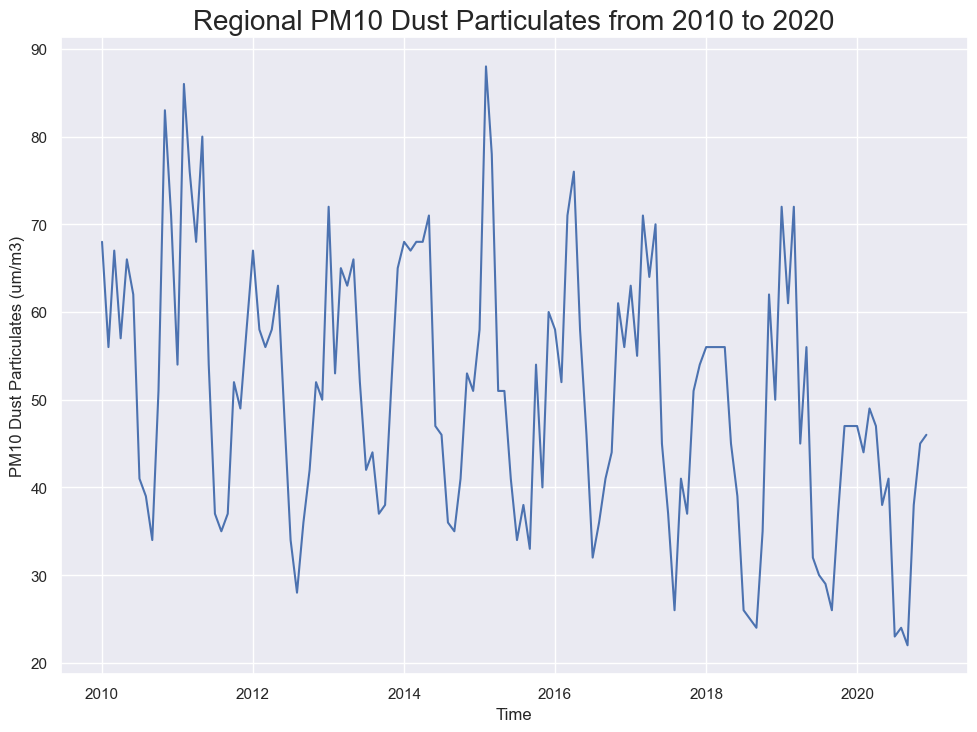

In [26]:
# Date vs. dust
plt.plot(gas_2010['DATE'], dust_df_2010.Gyeonggi)
plt.title('Regional PM10 Dust Particulates from 2010 to 2020', size=20)
plt.ylabel('PM10 Dust Particulates (um/m3)')
plt.xlabel('Time');

In [33]:
months = list(range(1,13))
sns.scatterplot(x=gas_2010.Month, y=dust_df_2010.Gyeonggi, hue=gas_2010.Year)
plt.ylabel('Fine Dust Particulate PM10 (ug/m3)')
plt.xlabel('Month of the Year')
plt.xticks(months)
plt.title('Dust Particulates During the Year By Month', size=20);

Despite not being as clear as the gas generation data, we can see recurring peaks and troughs in the fine dust data as well! Even just visually, we can see that there are 10 peaks of fine dust amount, occuring over the course of 10 years. This represents a <b>clear cyclic pattern of the presence of fine dust with respect to time</b>.  

## Additional Data: Pollutants

Similarly to PM10, there is also data on several pollutants that could be linked to PM10 or the usage of gas/electricity. The pollutants we will discuss are:
<br>1. Ozone
<br>2. Sulfuric Acid Gas
<br>3. Nitrogen Dioxide
<br>4. Carbon Monoxide
<br><br>These four pollutants will be discussed (along with the afformentioned PM10), and we will explore their relationships with each other, the weather, and electricity and gas usage. Again, for the sake of this EDA, we will focus on the biggest region, Gyeonggido.

### Import data

In [30]:
pollutants = pd.read_excel('Data/Pollutants.xlsx')
pollutants

Period  Gyeonggi_PM10  Gangwon_PM10  Chungbuk_PM10  Chungnam_PM10  \
0    2010.01             68            62             77             45   
1    2010.02             56            55             62             40   
2    2010.03             67            70             73             57   
3    2010.04             57            58             63             47   
4    2010.05             66            60             67             52   
..       ...            ...           ...            ...            ...   
150  2022.07             25            18             23             25   
151  2022.08             20            16             17             19   
152  2022.09             24            16             20             25   
153  2022.10             29            17             26             33   
154  2022.11             44            31             44             46   

     Jeonbuk_PM10  Jeonnam_PM10  Gyeongbuk_PM10  Gyeongnam_PM10  Jeju_PM10  \
0              55            46              50              45         54   
1              47            40              47              42         41   
2              62            58              62              61         71   
3              52            39              48              45         47   
4              66            51              54              52         58   
..            ...           ...             ...             ...        ...   
150            23            20              20              21         20   
151            18            17              18              19         18   
152            25            21              21              20         28   
153            31            21              24              21         26   
154            43            30              39              31         30   

     ...  Jeju_NO2  Gyeonggi_CO  Gangwon_CO  Chungbuk_CO  Chungnam_CO  \
0    ...     0.012          0.9         0.9          1.1          0.7   
1    ...     0.012          0.7         0.7          0.9          0.6   
2    ...     0.010          0.6         0.6          0.6          0.5   
3    ...     0.010          0.5         0.5          0.6          0.5   
4    ...     0.008          0.5         0.4          0.4          0.4   
..   ...       ...          ...         ...          ...          ...   
150  ...     0.005          0.3         0.3          0.3          0.4   
151  ...     0.005          0.3         0.3          0.3          0.3   
152  ...     0.006          0.3         0.3          0.3          0.3   
153  ...     0.006          0.4         0.3          0.4          0.4   
154  ...     0.008          0.4         0.4          0.5          0.4   

     Jeonbuk_CO  Jeonnam_CO  Gyeongbuk_CO  Gyeongnam_CO  Jeju_CO  
0           0.6         0.6           0.7           0.6      0.3  
1           0.6         0.6           0.6           0.6      0.4  
2           0.5         0.5           0.5           0.4      0.4  
3           0.4         0.5           0.4           0.4      0.4  
4           0.4         0.4           0.4           0.4      0.4  
..          ...         ...           ...           ...      ...  
150         0.3         0.3           0.3           0.4      0.2  
151         0.3         0.3           0.3           0.4      0.3  
152         0.3         0.3           0.3           0.3      0.2  
153         0.3         0.3           0.3           0.4      0.2  
154         0.4         0.4           0.4           0.5      0.3  

[155 rows x 46 columns]

Again, we should fix the data to be only up until 2020 to match the gas and weather data.

In [31]:
# Fix pollutants df to be before 2021
pollutants_2010 = pollutants[pollutants.Period < 2021.01]
pollutants_2010

Period  Gyeonggi_PM10  Gangwon_PM10  Chungbuk_PM10  Chungnam_PM10  \
0    2010.01             68            62             77             45   
1    2010.02             56            55             62             40   
2    2010.03             67            70             73             57   
3    2010.04             57            58             63             47   
4    2010.05             66            60             67             52   
..       ...            ...           ...            ...            ...   
127  2020.08             24            19             21             24   
128  2020.09             22            18             22             24   
129  2020.10             38            28             36             39   
130  2020.11             45            34             41             42   
131  2020.12             46            36             44             42   

     Jeonbuk_PM10  Jeonnam_PM10  Gyeongbuk_PM10  Gyeongnam_PM10  Jeju_PM10  \
0              55            46              50              45         54   
1              47            40              47              42         41   
2              62            58              62              61         71   
3              52            39              48              45         47   
4              66            51              54              52         58   
..            ...           ...             ...             ...        ...   
127            22            28              23              29         29   
128            23            22              22              24         26   
129            35            28              31              29         31   
130            36            29              36              30         28   
131            36            28              36              30         24   

     ...  Jeju_NO2  Gyeonggi_CO  Gangwon_CO  Chungbuk_CO  Chungnam_CO  \
0    ...     0.012          0.9         0.9          1.1          0.7   
1    ...     0.012          0.7         0.7          0.9          0.6   
2    ...     0.010          0.6         0.6          0.6          0.5   
3    ...     0.010          0.5         0.5          0.6          0.5   
4    ...     0.008          0.5         0.4          0.4          0.4   
..   ...       ...          ...         ...          ...          ...   
127  ...     0.005          0.3         0.4          0.3          0.3   
128  ...     0.007          0.4         0.4          0.4          0.4   
129  ...     0.008          0.5         0.4          0.4          0.5   
130  ...     0.009          0.5         0.4          0.5          0.5   
131  ...     0.010          0.6         0.5          0.6          0.5   

     Jeonbuk_CO  Jeonnam_CO  Gyeongbuk_CO  Gyeongnam_CO  Jeju_CO  
0           0.6         0.6           0.7           0.6      0.3  
1           0.6         0.6           0.6           0.6      0.4  
2           0.5         0.5           0.5           0.4      0.4  
3           0.4         0.5           0.4           0.4      0.4  
4           0.4         0.4           0.4           0.4      0.4  
..          ...         ...           ...           ...      ...  
127         0.3         0.4           0.3           0.3      0.2  
128         0.3         0.4           0.3           0.4      0.3  
129         0.4         0.4           0.4           0.4      0.3  
130         0.4         0.4           0.4           0.4      0.3  
131         0.4         0.5           0.5           0.5      0.3  

[132 rows x 46 columns]

### Check for missing values

In [107]:
pollutants_2010.isnull().sum()

Period             0
Gyeonggi_PM10      0
Gangwon_PM10       0
Chungbuk_PM10      0
Chungnam_PM10      0
Jeonbuk_PM10       0
Jeonnam_PM10       0
Gyeongbuk_PM10     0
Gyeongnam_PM10     0
Jeju_PM10          0
Gyeonggi_Ozone     0
Gangwon_Ozone      0
Chungbuk_Ozone     0
Chungnam_Ozone     0
Jeonbuk_Ozone      0
Jeonnam_Ozone      0
Gyeongbuk_Ozone    0
Gyeongnam_Ozone    0
Jeju_Ozone         0
Gyeonggi_SO3       0
Gangwon_SO3        0
Chungbuk_SO3       0
Chungnam_SO3       0
Jeonbuk_SO3        0
Jeonnam_SO3        0
Gyeongbuk_SO3      0
Gyeongnam_SO3      0
Jeju_SO3           0
Gyeonggi_NO2       0
Gangwon_NO2        0
Chungbuk_NO2       0
Chungnam_NO2       0
Jeonbuk_NO2        0
Jeonnam_NO2        0
Gyeongbuk_NO2      0
Gyeongnam_NO2      0
Jeju_NO2           0
Gyeonggi_CO        0
Gangwon_CO         0
Chungbuk_CO        0
Chungnam_CO        0
Jeonbuk_CO         0
Jeonnam_CO         0
Gyeongbuk_CO       0
Gyeongnam_CO       0
Jeju_CO            0
dtype: int64

This dataset is also clean and ready to go. Before we move on, let's also add a 'DATE' column to this dataframe so we don't need to rely on the 'Period' column.

In [32]:
pollutants_2010['DATE'] = gas_2010['DATE']
pollutants_2010.head()

Period  Gyeonggi_PM10  Gangwon_PM10  Chungbuk_PM10  Chungnam_PM10  \
0  2010.01             68            62             77             45   
1  2010.02             56            55             62             40   
2  2010.03             67            70             73             57   
3  2010.04             57            58             63             47   
4  2010.05             66            60             67             52   

   Jeonbuk_PM10  Jeonnam_PM10  Gyeongbuk_PM10  Gyeongnam_PM10  Jeju_PM10  ...  \
0            55            46              50              45         54  ...   
1            47            40              47              42         41  ...   
2            62            58              62              61         71  ...   
3            52            39              48              45         47  ...   
4            66            51              54              52         58  ...   

   Gyeonggi_CO  Gangwon_CO  Chungbuk_CO  Chungnam_CO  Jeonbuk_CO  Jeonnam_CO  \
0          0.9         0.9          1.1          0.7         0.6         0.6   
1          0.7         0.7          0.9          0.6         0.6         0.6   
2          0.6         0.6          0.6          0.5         0.5         0.5   
3          0.5         0.5          0.6          0.5         0.4         0.5   
4          0.5         0.4          0.4          0.4         0.4         0.4   

   Gyeongbuk_CO  Gyeongnam_CO  Jeju_CO       DATE  
0           0.7           0.6      0.3 2010-01-01  
1           0.6           0.6      0.4 2010-02-01  
2           0.5           0.4      0.4 2010-03-01  
3           0.4           0.4      0.4 2010-04-01  
4           0.4           0.4      0.4 2010-05-01  

[5 rows x 47 columns]

### Initial Visualization
Let's take a look at each pollutant's change with respect to time. From previous data, we expect a sort of cyclical behaviour throughout the years. Will the other pollutants also have this trend?

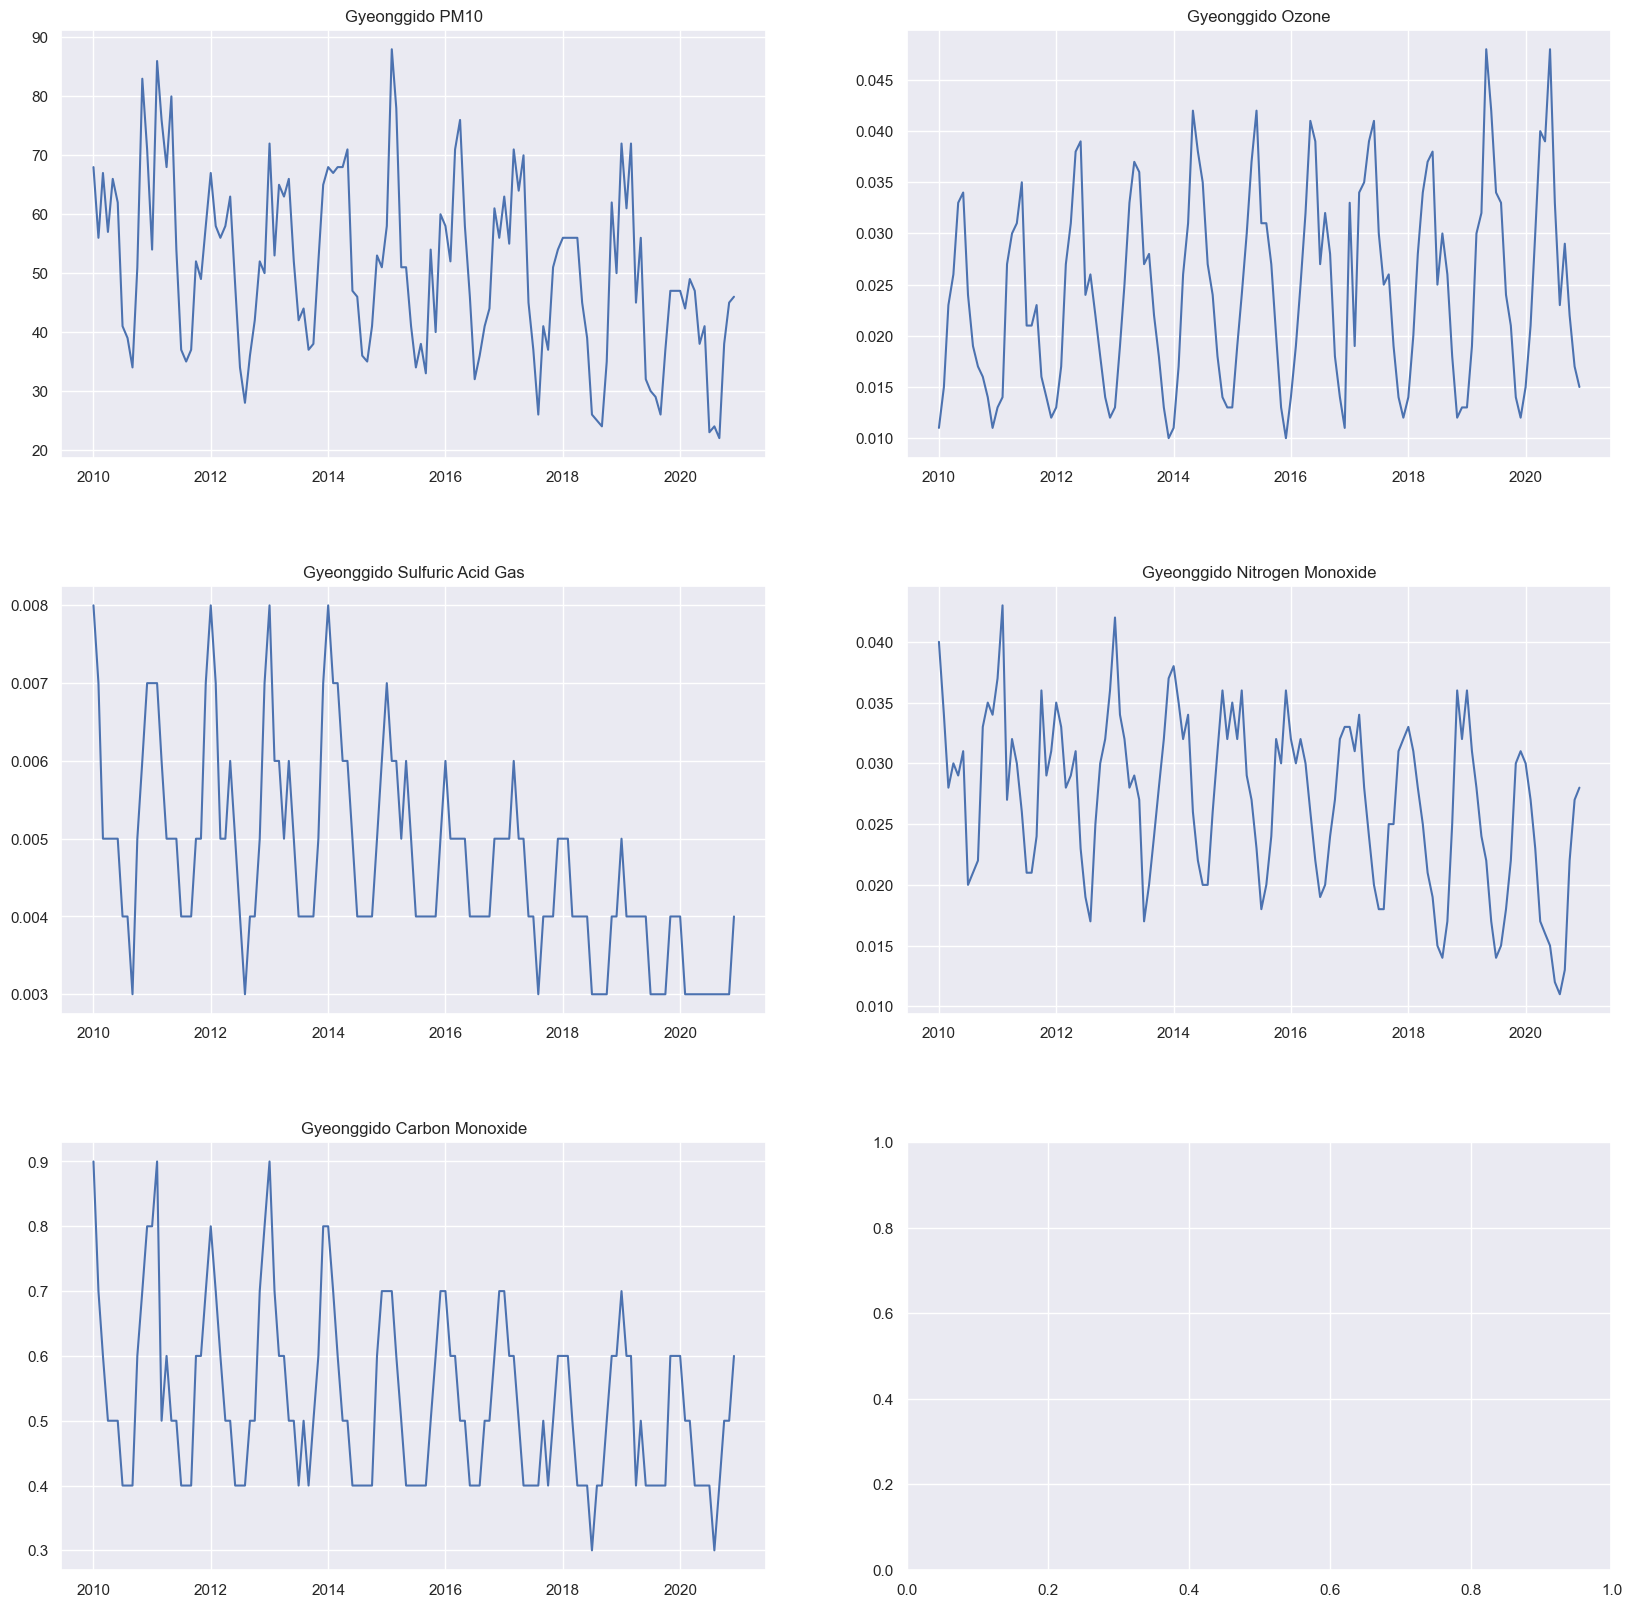

In [73]:
fig, axs = plt.subplots(3,2, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)

axs = axs.ravel()

labels = ['Gyeonggido PM10', 'Gyeonggido Ozone', 'Gyeonggido Sulfuric Acid Gas', 'Gyeonggido Nitrogen Monoxide', 'Gyeonggido Carbon Monoxide']

for i in range(5):
    axs[i].plot(pollutants_2010['DATE'], pollutants_2010.iloc[:,9*i + 1], label=labels)
    axs[i].set_title(labels[i])

Turns out, the other pollutants also behave in a similarly cyclical fashion, similar to PM10 (fine dust)! The one slightly different pollutant here is Ozone, which has a reverse cyclical pattern, as it peaks while the other pollutants reach their minimum during the year.

### Checking for independence between features
Let's use a heatmap to see how strong the correlation is between features. This may affect what models we choose, as despite very linearly dependent looking data, we might not want to use Linear Regression if the features are not independent enough (this would violate linear regression assumptions).

<Axes: >

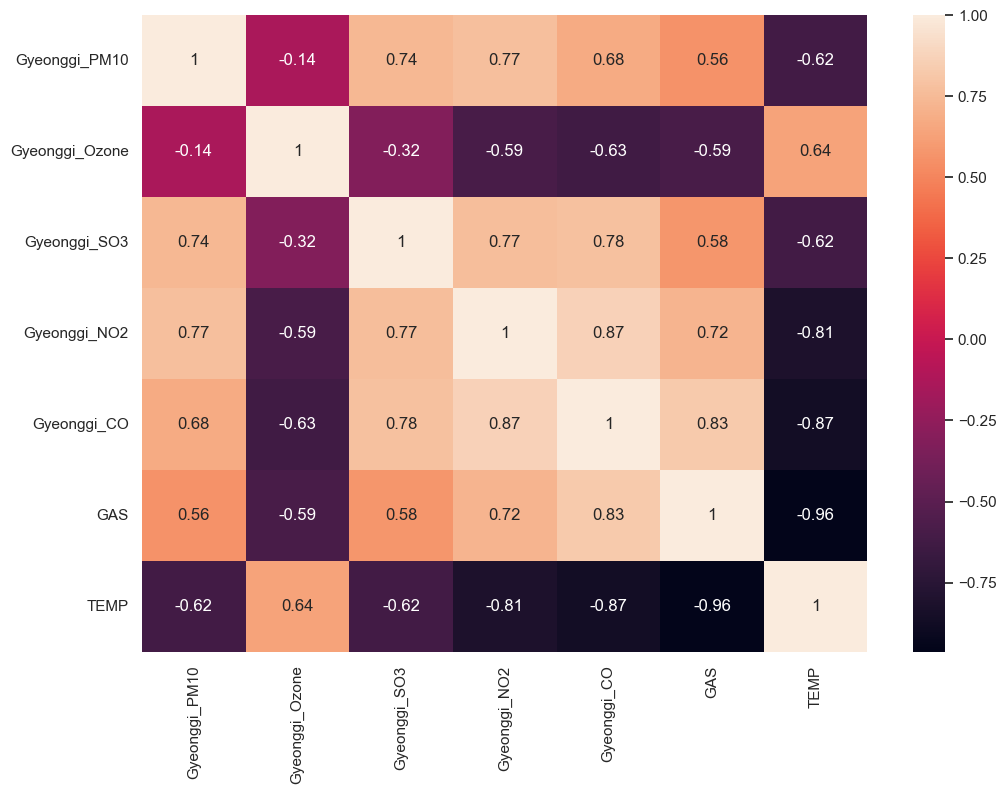

In [33]:
gyeonggi = []
for i in range(5):
    gyeonggi.append(9*i + 1)
pollutants_gyeonggi = pollutants_2010.iloc[:,gyeonggi]
pollutants_gyeonggi['GAS'] = gas_2010['Gyeonggido_Gas']
pollutants_gyeonggi['TEMP'] = weather_df_2010['Gyeonggido']
sns.heatmap(pollutants_gyeonggi.corr(), annot=True)

It appears that some features are not completely linearly independent! We will keep this in mind when choosing a model for these features. Also, note that when predicting GAS usage, the TEMP has the strongest correlation out of the features we've explored. Let's continue on to some modeling! 

# Stuff I've played around with but not sure if it's useful

## Precipitation

In [34]:
precipitation = pd.read_excel('Data/Weather.xlsx', sheet_name='Precipitation')
seoul_prec = precipitation.iloc[:,0:4]
seoul_prec

Period  Seoul Total Precipitation (mm)  Seoul Mean Wind Speed (m/s)  \
0     2000.01                            42.8                          2.6   
1     2000.02                             2.1                          2.7   
2     2000.03                             3.1                          3.0   
3     2000.04                            30.7                          2.9   
4     2000.05                            75.2                          2.3   
..        ...                             ...                          ...   
259   2021.08                           211.2                          2.1   
260   2021.09                           131.0                          2.3   
261   2021.10                            57.0                          2.1   
262   2021.11                            62.4                          2.1   
263   2021.12                             7.9                          2.3   

     Seoul Mean Rel. Humid. (%)  
0                            64  
1                            56  
2                            55  
3                            56  
4                            66  
..                          ...  
259                          74  
260                          71  
261                          70  
262                          68  
263                          62  

[264 rows x 4 columns]

In [35]:
temperature = pd.read_excel('Data/Weather.xlsx', sheet_name='Regional Average Temp')
seoul_prec['Temperature'] = temperature.Seoul
seoul_prec.isna().sum()

Period                             0
Seoul Total Precipitation (mm)     0
Seoul Mean Wind Speed (m/s)        0
Seoul Mean Rel. Humid. (%)         0
Temperature                       12
dtype: int64

In [36]:
seoul_prec = seoul_prec.dropna()
seoul_prec

Period  Seoul Total Precipitation (mm)  Seoul Mean Wind Speed (m/s)  \
0     2000.01                            42.8                          2.6   
1     2000.02                             2.1                          2.7   
2     2000.03                             3.1                          3.0   
3     2000.04                            30.7                          2.9   
4     2000.05                            75.2                          2.3   
..        ...                             ...                          ...   
247   2020.08                           675.7                          2.3   
248   2020.09                           181.5                          2.5   
249   2020.10                             0.0                          2.1   
250   2020.11                           120.1                          2.2   
251   2020.12                             4.6                          2.2   

     Seoul Mean Rel. Humid. (%)  Temperature  
0                            64         -2.1  
1                            56         -1.7  
2                            55          6.3  
3                            56         11.9  
4                            66         17.5  
..                          ...          ...  
247                          85         26.5  
248                          71         21.4  
249                          60         14.3  
250                          64          8.0  
251                          58         -0.3  

[252 rows x 5 columns]

In [37]:
cols = []
for c in seoul_prec.columns:
    cols.append(c)
print(cols)

['Period', 'Seoul\xa0Total Precipitation (mm)', 'Seoul\xa0Mean Wind Speed (m/s)', 'Seoul\xa0Mean Rel. Humid. (%)', 'Temperature']


In [38]:
def normalize(df):
    for column in df.columns:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min()) 
    return df

prec_norm = normalize(seoul_prec.iloc[:,1:5])
prec_norm

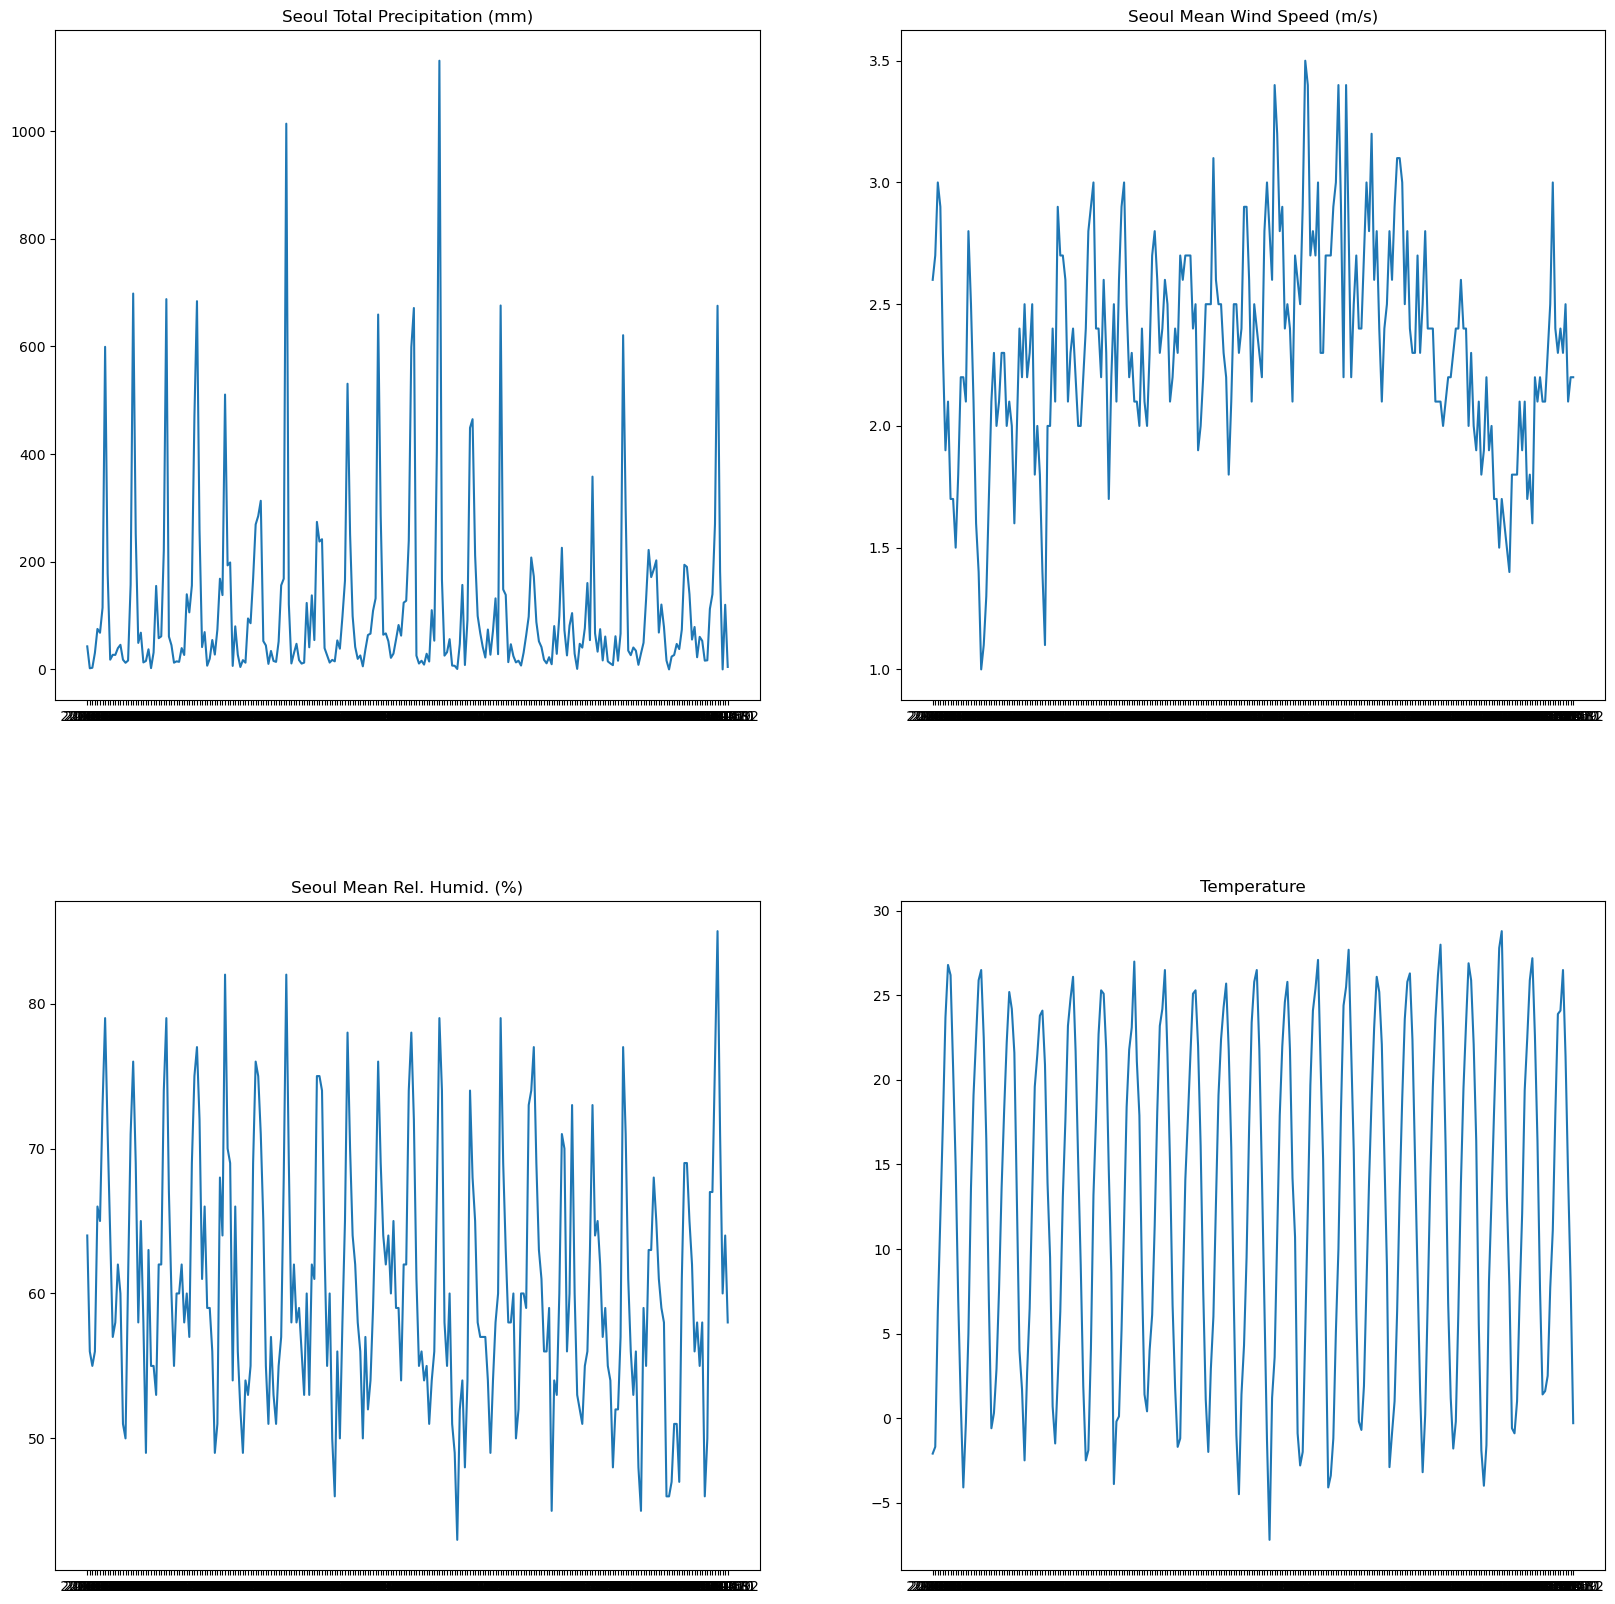

In [25]:
fig, axs = plt.subplots(2,2, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)

axs = axs.ravel()

for i in range(4):
    axs[i].plot(seoul_prec['Period'], seoul_prec.iloc[:,i+1], label=cols[i])
    axs[i].set_title(cols[i+1])

In [6]:
infect = pd.read_excel('Data/HealthData.xlsx', sheet_name='Infectious Disease')
total_monthly_op = pd.read_excel('Data/HealthData.xlsx', sheet_name='Operations_All_Monthly')
regional_annual_op = pd.read_excel('Data/HealthData.xlsx', sheet_name='Operations_Regional_Annual')
pharm_sales = pd.read_excel('Data/HealthData.xlsx', sheet_name='Pharmaceutical Sales Per Capita')
travel = pd.read_excel('Data/Travel.xlsx')

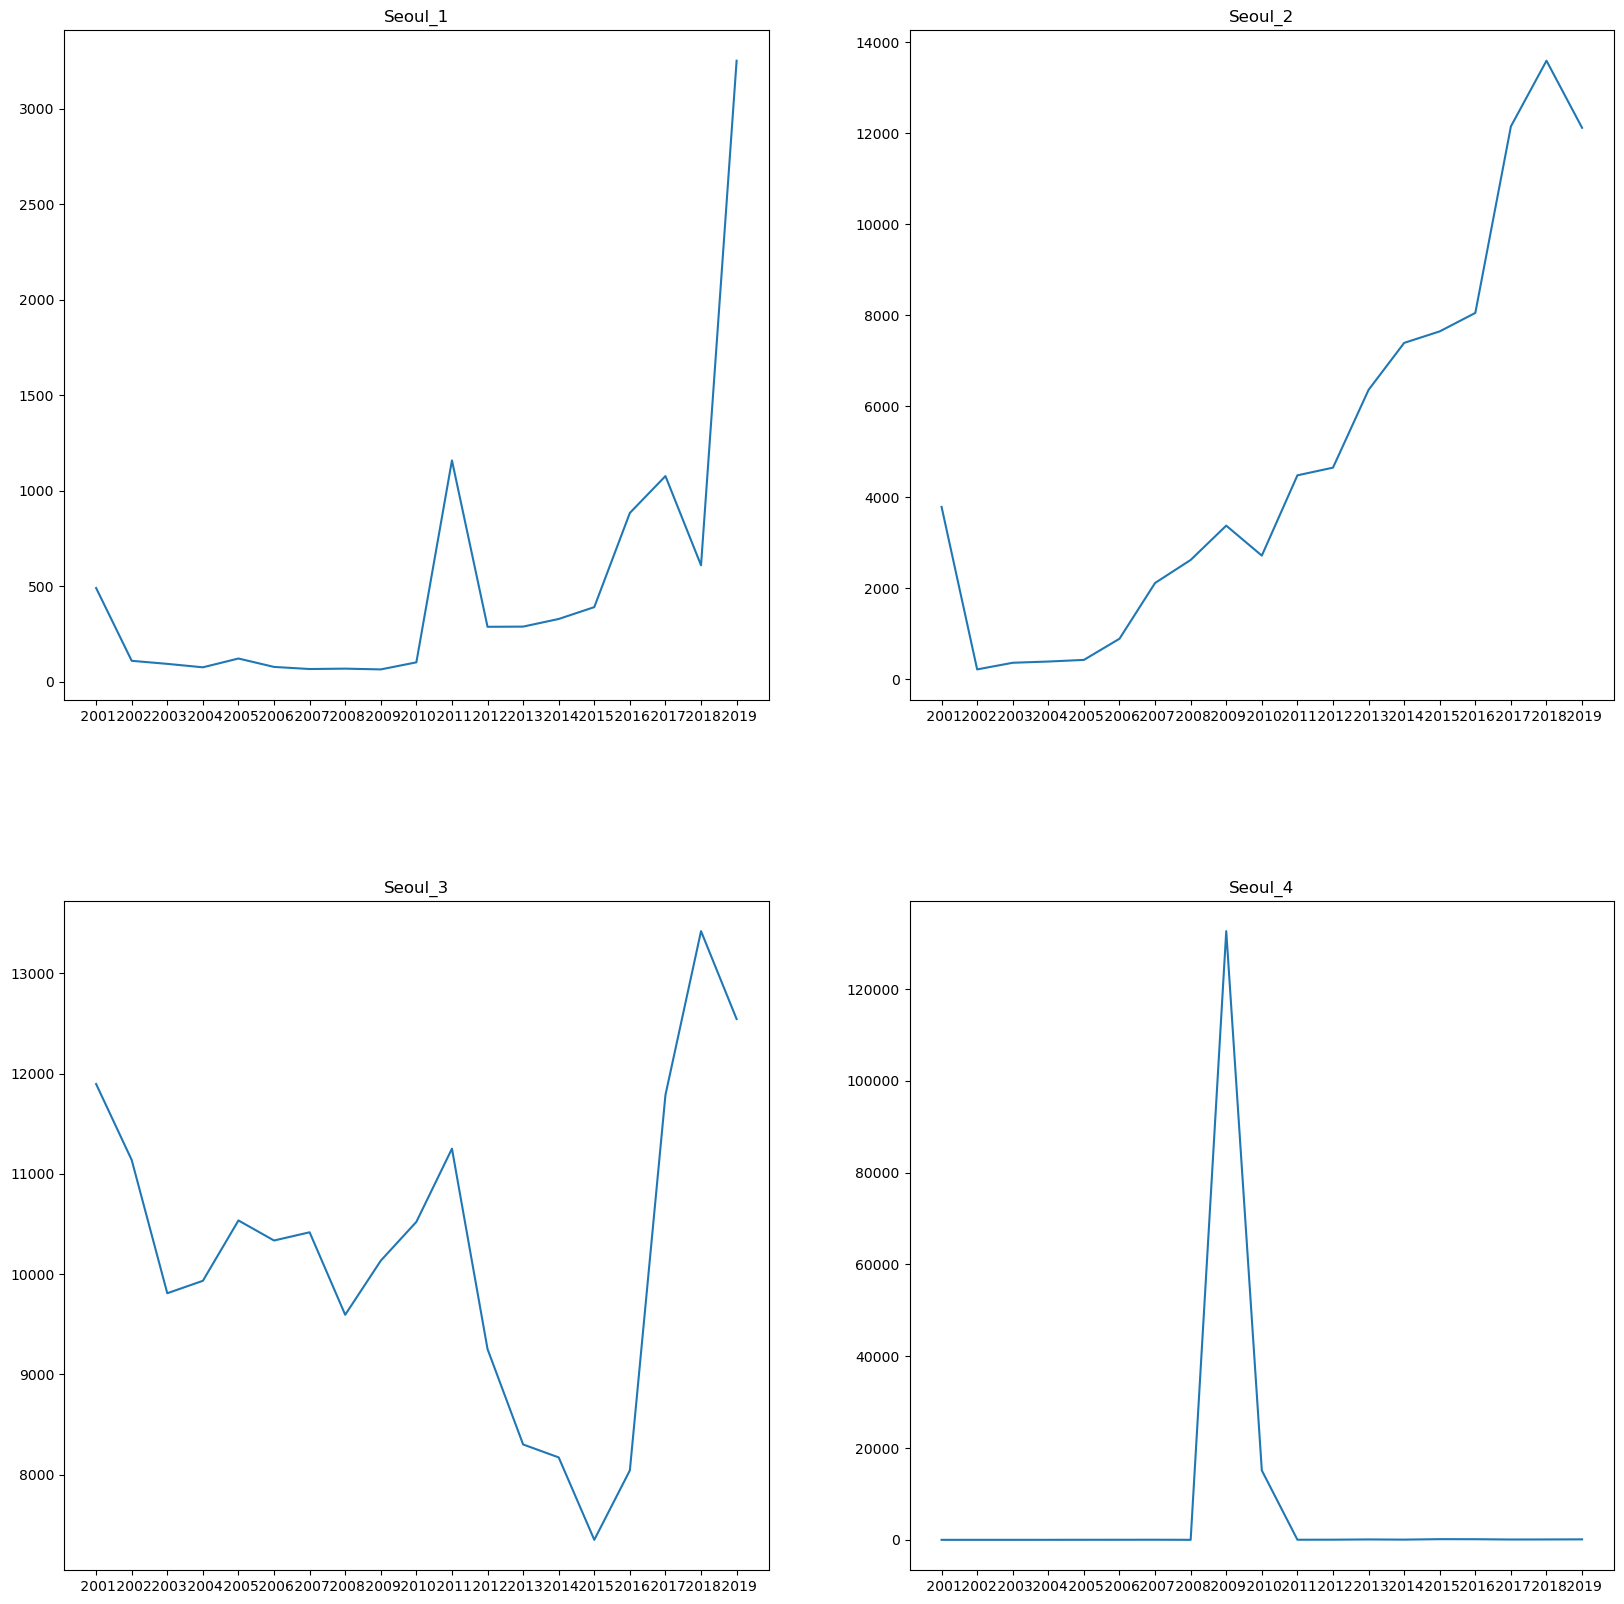

In [36]:
seoul_cols = ['Seoul_1', 'Seoul_2', 'Seoul_3', 'Seoul_4']
fig, axs = plt.subplots(2,2, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)

axs = axs.ravel()

for i in range(4):
    axs[i].plot(infect['Year'], infect.iloc[:,18*i + 2], label=seoul_cols[i])
    axs[i].set_title(seoul_cols[i])

### 2009 H1N1 pandemic (seoul_4)

<u>Group 1</u>: CHOLERA, TYPHOID FEVER, PARATYPHOID FEVER, SHIGGELOSIS, ENTEROHEMORRHAGIC E. COLI INFECTION, HEP A
<br><br><u>Group 2</u>: DIPHTHERIA, PERTUSSIS, TETANUS, MEASLES, MUMPS, RUBELLA, POLLOMYELITIS, HEP B, JAPANESE ENCEPHALITIS, VARICELLA, HAEMOPHILUS INFLUENZA TYPE B, STREPTOCOCCUS PNEUMONIAE
<br><br><u>Group 3</u>: MALARIA, SCARLET FEVER, MENINGOCOCCAL MENINGTIS, LEGIONELLOSIS, VIBRIO VULNIFICUS SEPSIS, EPIDERMIC TYPHUS, MURINE TYPHUS, SCRUB TYPHUS, LEPTOSPIROSIS, BRUCELLOSIS, ANTHRAX, RABIES, HEMORRHAGIC FEVER WITH RENAL SYNDROME, SYPHILLIS, CREUTZFELDT-JAKOB DISEASE, TUBERCULOSIS, LEPROCY, HIV/AIDS, VIRAL HEP C, VRSA INFECTION, CRE INFECTION
<br><br><u>Group 4</u>: PLAGUE, YELLOW FEVER, DENGUE FEVER, VIRAL HEMORRHAGIC FEVER, SMALLPOX, BOTULISM, SARS, ANIMAL INFLUENZA INFECTION IN HUMANS, NOVEL INFLUENZA, TULAREMIA, Q FEVER, WEST NILE FEVER, NOVEL INFECTIOUS SYNDROME, LYME DISEASE, THCK-BORNE ENCEPHALITIS, MELLOLDOSIS, CHIKUNGUNYA FEVER, SEVER FEVER WITH THROMBOCYTOPENIA SYNDROME, MIDDLE EAST RESPIRATORY SYNDROME, ZIKA VIRUS INFECTION, LELSHMANLASIS, BABELOSIS, CRYTOSPORIDIOSIS, SCHISTOSOMIASIS


In [39]:
total_monthly_op['DATE'] = pd.to_datetime(total_monthly_op[['Year', 'Month']].assign(DAY=1))

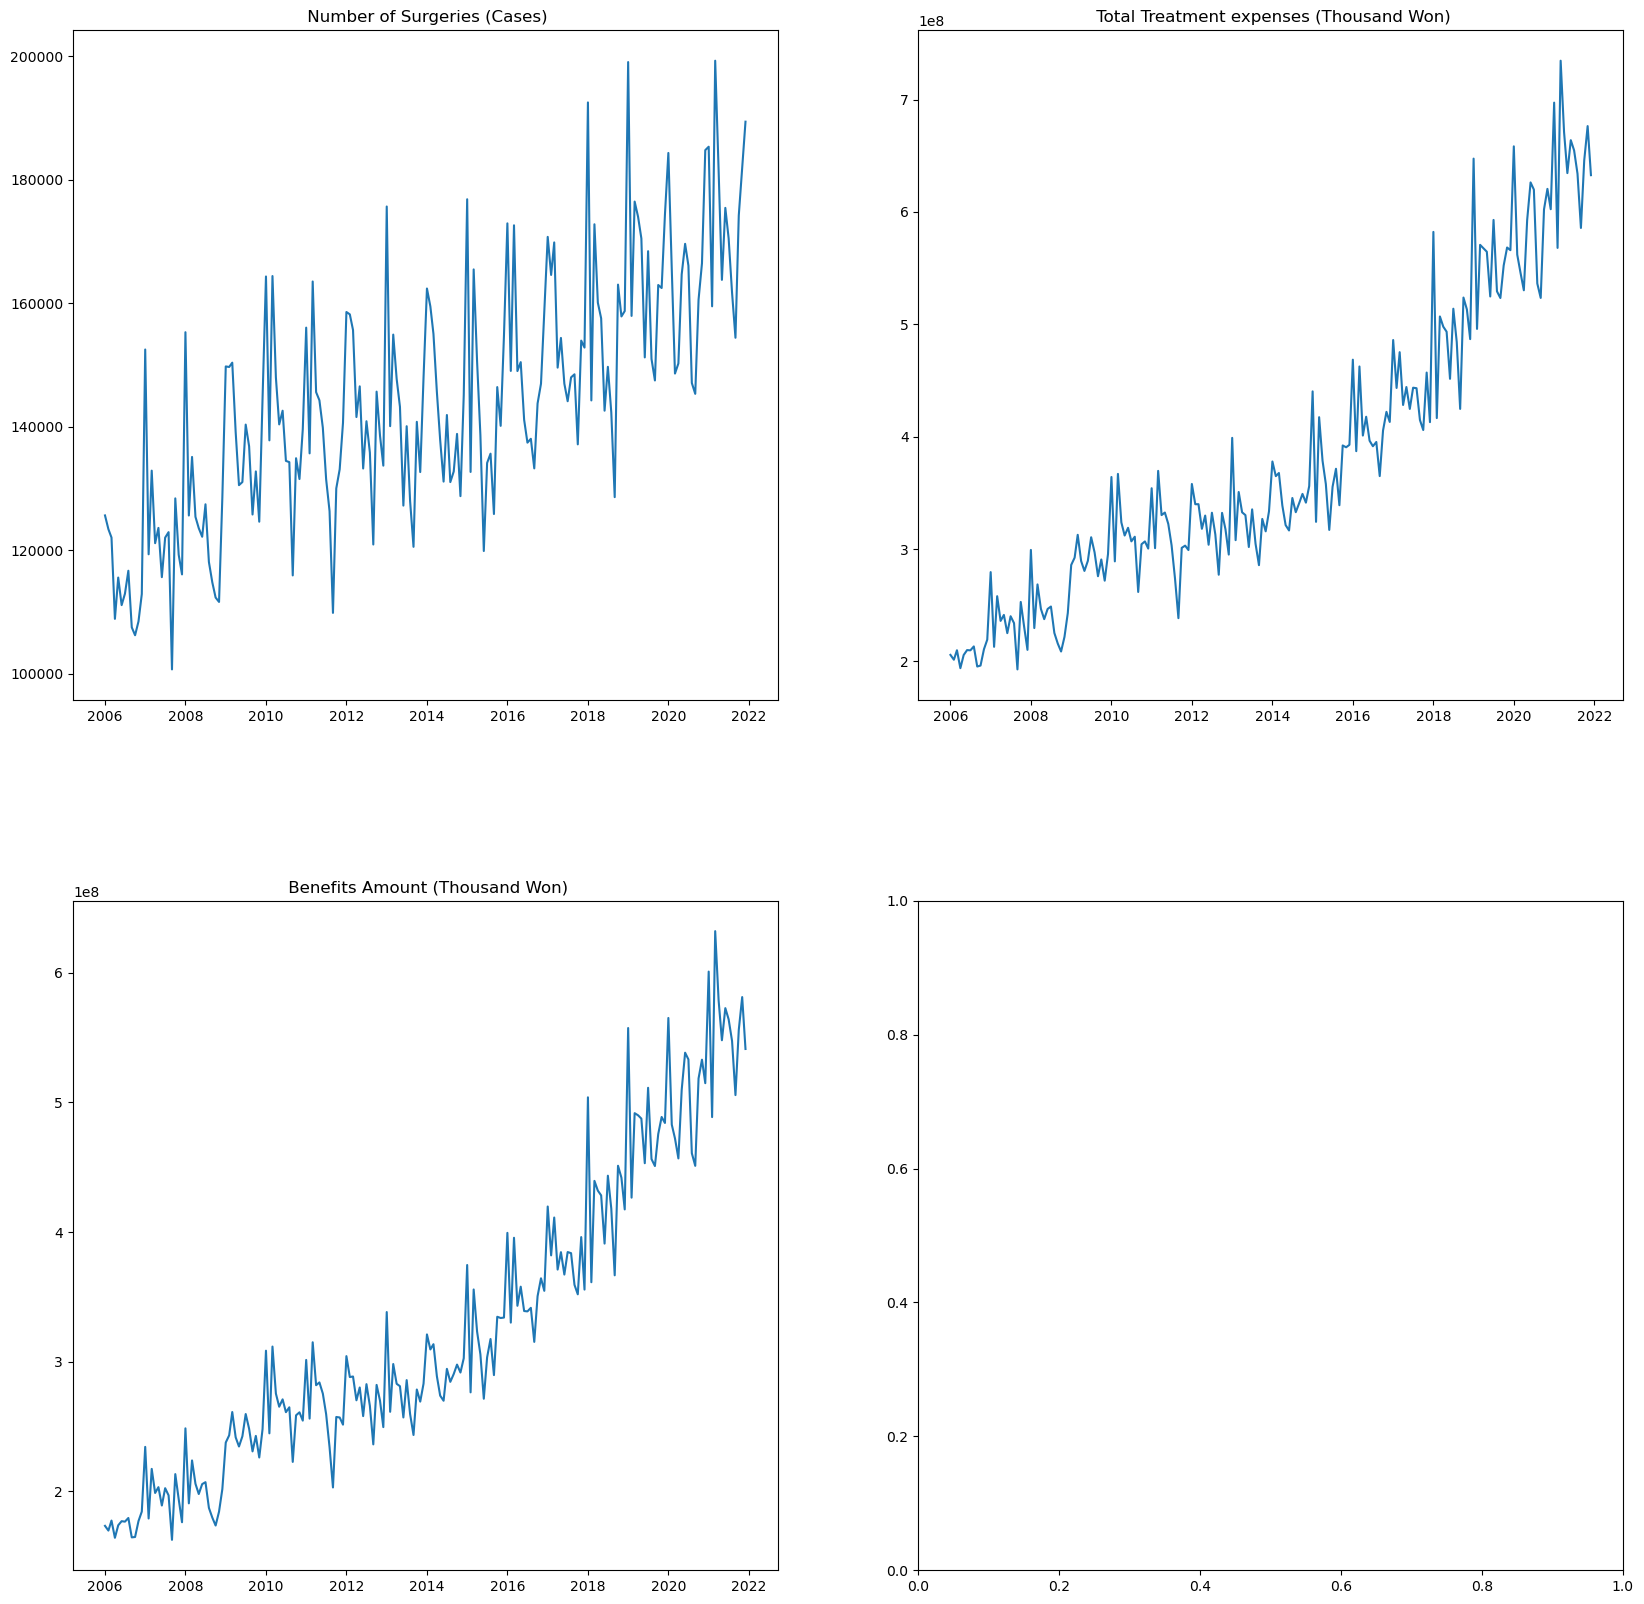

In [80]:
fig, axs = plt.subplots(2,2, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)

axs = axs.ravel()

for i in range(3):
    axs[i].plot(total_monthly_op.DATE, total_monthly_op.iloc[:,i+2], label=total_monthly_op.columns[i+2])
    axs[i].set_title(total_monthly_op.columns[i+2])

In [40]:
monthly_op_norm = normalize(total_monthly_op.iloc[:,2:5])
monthly_op_norm['Month'] = total_monthly_op['Month']
monthly_op_norm['Year'] = total_monthly_op['Year']
monthly_op_norm

Number of Surgeries (Cases)   Total Treatment expenses (Thousand Won)  \
0                        0.252977                                  0.023854   
1                        0.230284                                  0.015905   
2                        0.216629                                  0.031477   
3                        0.083054                                  0.002011   
4                        0.150892                                  0.023640   
..                            ...                                       ...   
187                      0.619007                                  0.814328   
188                      0.544850                                  0.725236   
189                      0.745663                                  0.836217   
190                      0.824396                                  0.892591   
191                      0.899832                                  0.811966   

      Benefits Amount (Thousand Won)  Month  Year  
0                           0.022993      1  2006  
1                           0.015223      2  2006  
2                           0.031655      3  2006  
3                           0.003353      4  2006  
4                           0.023913      5  2006  
..                               ...    ...   ...  
187                         0.819651      8  2021  
188                         0.730660      9  2021  
189                         0.837675     10  2021  
190                         0.891692     11  2021  
191                         0.806405     12  2021  

[192 rows x 5 columns]

### Time Series Data is non-stationary (clear upward trend). Use .diff() to check for monthly patterns

In [82]:
cases = monthly_op_norm.iloc[:,0]
cases = cases.diff()
plt.plot(cases.index, cases)

In [67]:
fig, axs = plt.subplots(2,2, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)

axs = axs.ravel()

for i in range(3):
    axs[i].scatter(monthly_op_norm.Month, monthly_op_norm.iloc[:,i].diff(), label=monthly_op_norm.columns[i])
    axs[i].set_title(monthly_op_norm.columns[i])

### There is some sort of monthly pattern. For example, Feb usually has less surgeries, Jan and March have more.

Get it ready for corr plot (remove years before 2010 and after 2020)

In [60]:
abcd = monthly_op_norm[(monthly_op_norm.loc[:,'Year'] > 2009) & (monthly_op_norm.loc[:,'Year'] < 2021)]
abcd

Number of Surgeries (Cases)   Total Treatment expenses (Thousand Won)  \
48                       0.645535                                  0.316106   
49                       0.376306                                  0.177488   
50                       0.646235                                  0.321182   
51                       0.479630                                  0.241546   
52                       0.402540                                  0.219973   
..                            ...                                       ...   
175                      0.470570                                  0.634052   
176                      0.452685                                  0.610315   
177                      0.607402                                  0.755691   
178                      0.667204                                  0.789429   
179                      0.853095                                  0.756037   

      Benefits Amount (Thousand Won)  Month  Year  
48                          0.310733      1  2010  
49                          0.174963      2  2010  
50                          0.317539      3  2010  
51                          0.240333      4  2010  
52                          0.218716      5  2010  
..                               ...    ...   ...  
175                         0.635170      8  2020  
176                         0.614456      9  2020  
177                         0.758018     10  2020  
178                         0.788804     11  2020  
179                         0.750218     12  2020  

[132 rows x 5 columns]

In [90]:
seoul_prec.Period[seoul_prec.Period == '\xa02010.01']

120     2010.01
Name: Period, dtype: object

In [92]:
efgh = seoul_prec.iloc[120:,:]
efgh

Period  Seoul Total Precipitation (mm)  Seoul Mean Wind Speed (m/s)  \
120   2010.01                            29.3                          2.3   
121   2010.02                            55.3                          2.4   
122   2010.03                            82.5                          2.9   
123   2010.04                            62.8                          2.9   
124   2010.05                           124.0                          2.6   
..        ...                             ...                          ...   
247   2020.08                           675.7                          2.3   
248   2020.09                           181.5                          2.5   
249   2020.10                             0.0                          2.1   
250   2020.11                           120.1                          2.2   
251   2020.12                             4.6                          2.2   

     Seoul Mean Rel. Humid. (%)  Temperature  
120                          65         -4.5  
121                          59          1.4  
122                          59          4.3  
123                          54          9.5  
124                          62         17.2  
..                          ...          ...  
247                          85         26.5  
248                          71         21.4  
249                          60         14.3  
250                          64          8.0  
251                          58         -0.3  

[132 rows x 5 columns]

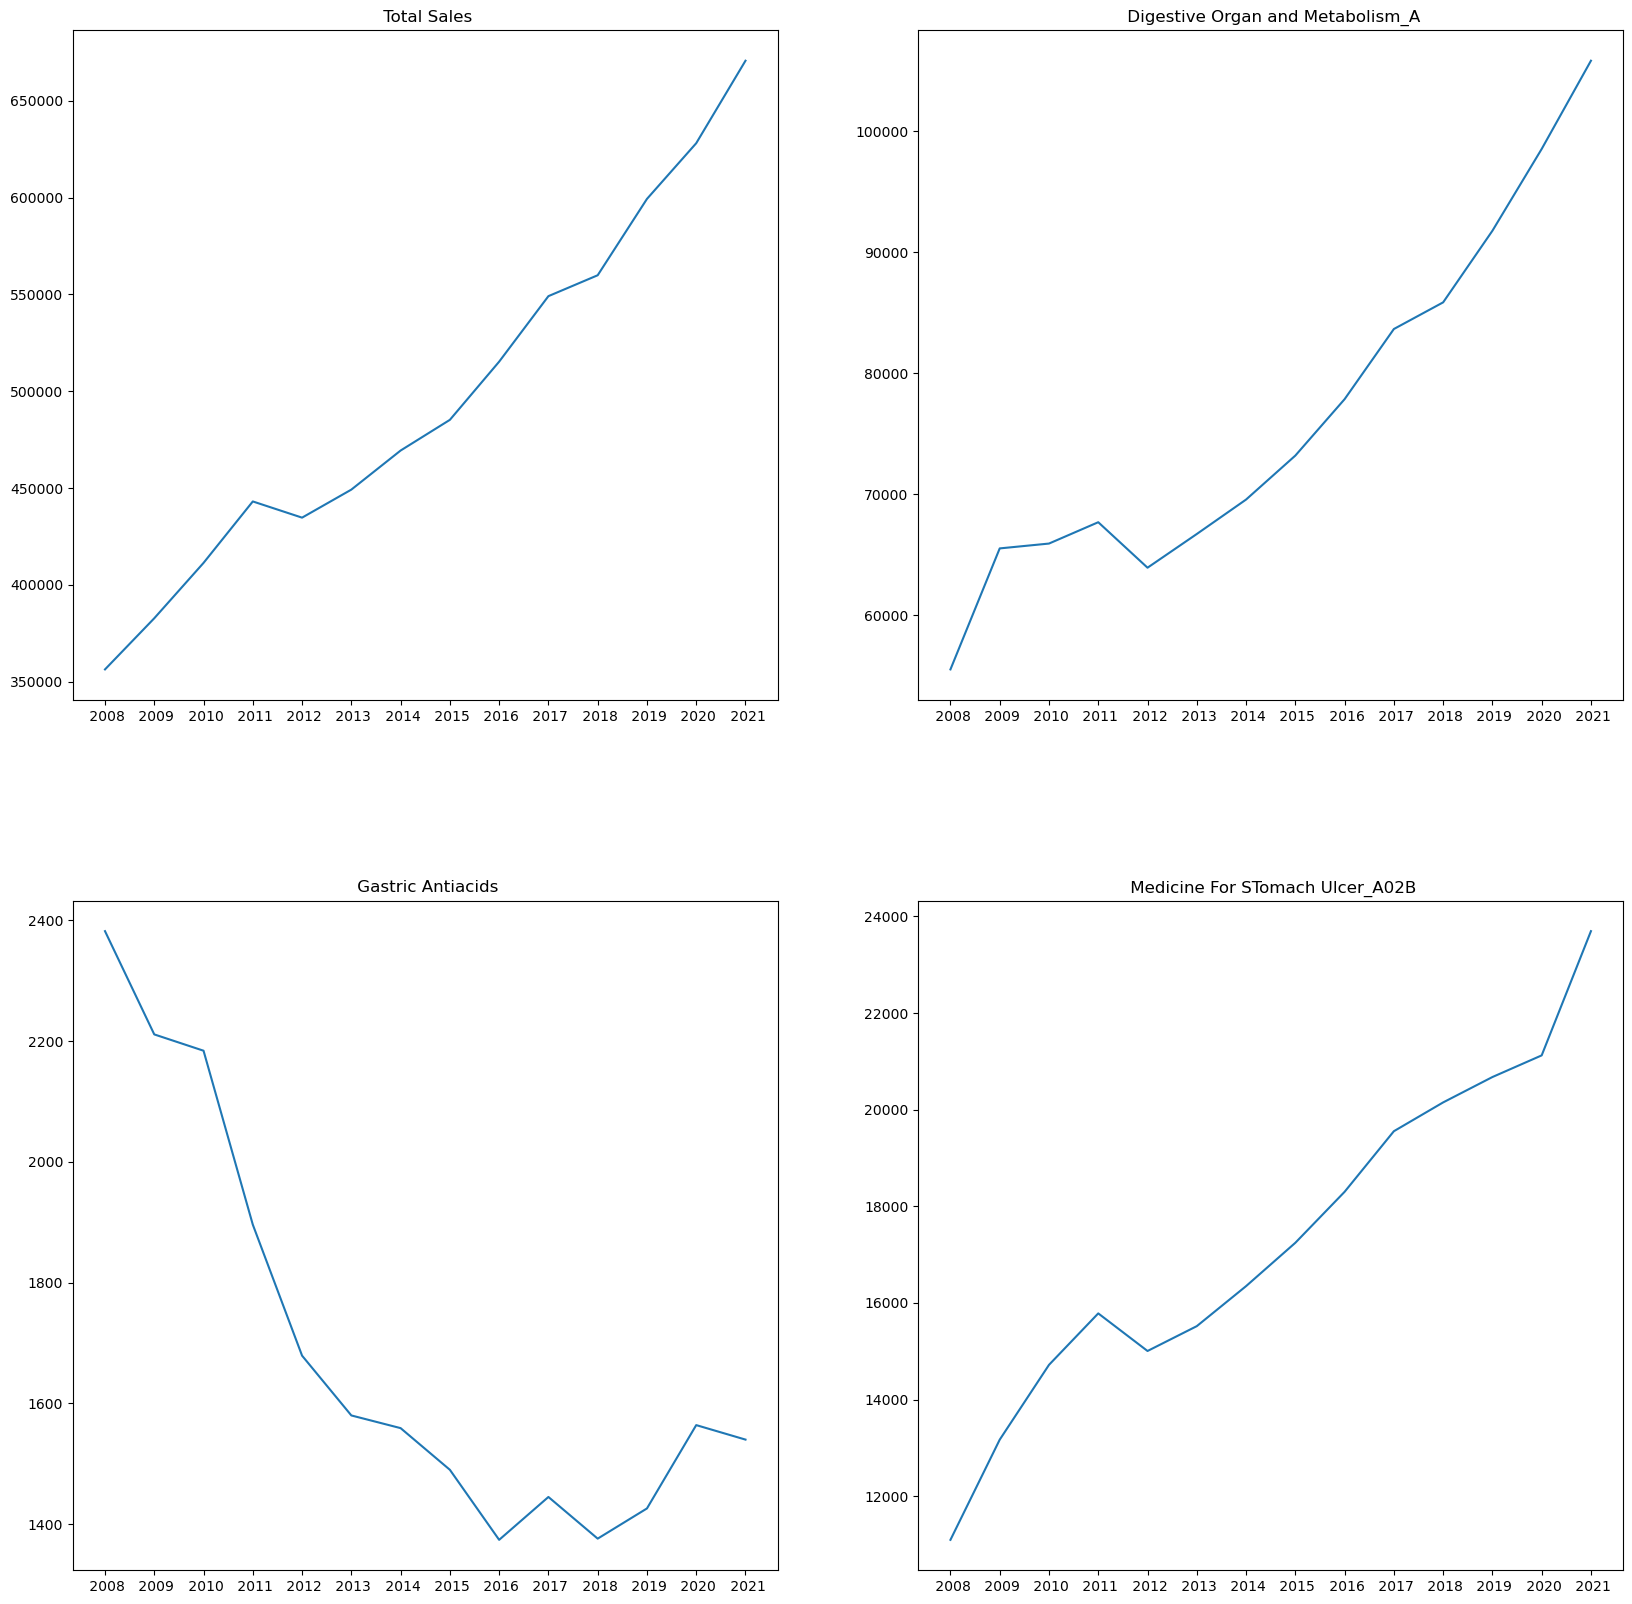

In [69]:
fig, axs = plt.subplots(2,2, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)

axs = axs.ravel()

for i in range(4):
    axs[i].plot(pharm_sales.Year, pharm_sales.iloc[:,i+1], label=pharm_sales.columns[i+1])
    axs[i].set_title(pharm_sales.columns[i+1])

In [11]:
travel_test = travel.iloc[:,0:10]
travel_test['DATE'] = pd.to_datetime(travel_test[['Year', 'Month']].assign(DAY=1))
travel_test

Year  Month  Domestic Total (passenger)  Domestic Railway (passenger)  \
0    2006      1                9.599231e+08                      77053241   
1    2006      2                9.383021e+08                      74422513   
2    2006      3                1.046846e+09                      82173765   
3    2006      4                1.021385e+09                      83423214   
4    2006      5                1.060103e+09                      87245424   
..    ...    ...                         ...                           ...   
175  2020      8                8.676164e+08                      88233411   
176  2020      9                8.103379e+08                      82310314   
177  2020     10                8.998295e+08                      99205241   
178  2020     11                9.108398e+08                     100209170   
179  2020     12                7.721812e+08                      78784016   

     Domestic Subway (passenger)  Domestic Public road (passenger)  \
0                      165701791                       715039394.0   
1                      162910686                       699168389.0   
2                      186459613                       776133652.0   
3                      179762483                       755687259.0   
4                      186280029                       783879075.0   
..                           ...                               ...   
175                    210994134                       564212025.8   
176                    198322048                       527092102.7   
177                    229668142                       567020062.1   
178                    235739501                       571034413.7   
179                    192568645                       498464183.9   

     Domestic Shipping (passenger)  Domestic flight (passenger)  \
0                         753848.0                      1374791   
1                         568835.0                      1231715   
2                         703389.0                      1375432   
3                         917731.0                      1594357   
4                        1084660.0                      1614033   
..                             ...                          ...   
175                      1350282.0                      2826597   
176                       765572.0                      1847900   
177                      1188697.0                      2747342   
178                       913468.0                      2943250   
179                       649598.0                      1714754   

     Domestic Total (passenger-km)  Domestic Railway (passenger-km)       DATE  
0                     1.312936e+10                     2.765423e+09 2006-01-01  
1                     1.209360e+10                     2.461172e+09 2006-02-01  
2                     1.346656e+10                     2.406998e+09 2006-03-01  
3                     1.388652e+10                     2.636187e+09 2006-04-01  
4                     1.442463e+10                     2.755425e+09 2006-05-01  
..                             ...                              ...        ...  
175                   8.270225e+09                     3.042135e+09 2020-08-01  
176                   7.433859e+09                     2.480322e+09 2020-09-01  
177                   8.683588e+09                     3.226345e+09 2020-10-01  
178                   8.702768e+09                     3.271428e+09 2020-11-01  
179                   6.903719e+09                     2.317653e+09 2020-12-01  

[180 rows x 11 columns]

In [13]:
fig, axs = plt.subplots(4,2, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)

axs = axs.ravel()

for i in range(8):
    axs[i].plot(travel_test.DATE, travel_test.iloc[:,i+2], label=travel_test.columns[i+2])
    axs[i].set_title(travel_test.columns[i+2])

In [94]:
ijkl = travel_test[(travel_test.loc[:,'Year'] > 2009) & (travel_test.loc[:,'Year'] < 2021)]
ijkl

Year  Month  Domestic Total (passenger)  Domestic Railway (passenger)  \
48   2010      1                1.032067e+09                      84187508   
49   2010      2                9.624705e+08                      75890330   
50   2010      3                1.121551e+09                      93044969   
51   2010      4                1.112939e+09                      91750140   
52   2010      5                1.129897e+09                      94277175   
..    ...    ...                         ...                           ...   
175  2020      8                8.676164e+08                      88233411   
176  2020      9                8.103379e+08                      82310314   
177  2020     10                8.998295e+08                      99205241   
178  2020     11                9.108398e+08                     100209170   
179  2020     12                7.721812e+08                      78784016   

     Domestic Subway (passenger)  Domestic Public road (passenger)  \
48                     184686521                      7.608908e+08   
49                     164344806                      7.199098e+08   
50                     201718774                      8.243309e+08   
51                     196996580                      8.209752e+08   
52                     198559277                      8.335443e+08   
..                           ...                               ...   
175                    210994134                      5.642120e+08   
176                    198322048                      5.270921e+08   
177                    229668142                      5.670201e+08   
178                    235739501                      5.710344e+08   
179                    192568645                      4.984642e+08   

     Domestic Shipping (passenger)  Domestic flight (passenger)  \
48                        841280.0                      1461208   
49                        875593.0                      1449965   
50                        892199.0                      1564031   
51                       1317951.0                      1899228   
52                       1582974.0                      1933693   
..                             ...                          ...   
175                      1350282.0                      2826597   
176                       765572.0                      1847900   
177                      1188697.0                      2747342   
178                       913468.0                      2943250   
179                       649598.0                      1714754   

     Domestic Total (passenger-km)  Domestic Railway (passenger-km)       DATE  
48                    1.121893e+10                     2.695693e+09 2010-01-01  
49                    1.079828e+10                     2.509503e+09 2010-02-01  
50                    1.222333e+10                     2.672295e+09 2010-03-01  
51                    1.282441e+10                     2.690266e+09 2010-04-01  
52                    1.330336e+10                     2.914545e+09 2010-05-01  
..                             ...                              ...        ...  
175                   8.270225e+09                     3.042135e+09 2020-08-01  
176                   7.433859e+09                     2.480322e+09 2020-09-01  
177                   8.683588e+09                     3.226345e+09 2020-10-01  
178                   8.702768e+09                     3.271428e+09 2020-11-01  
179                   6.903719e+09                     2.317653e+09 2020-12-01  

[132 rows x 11 columns]

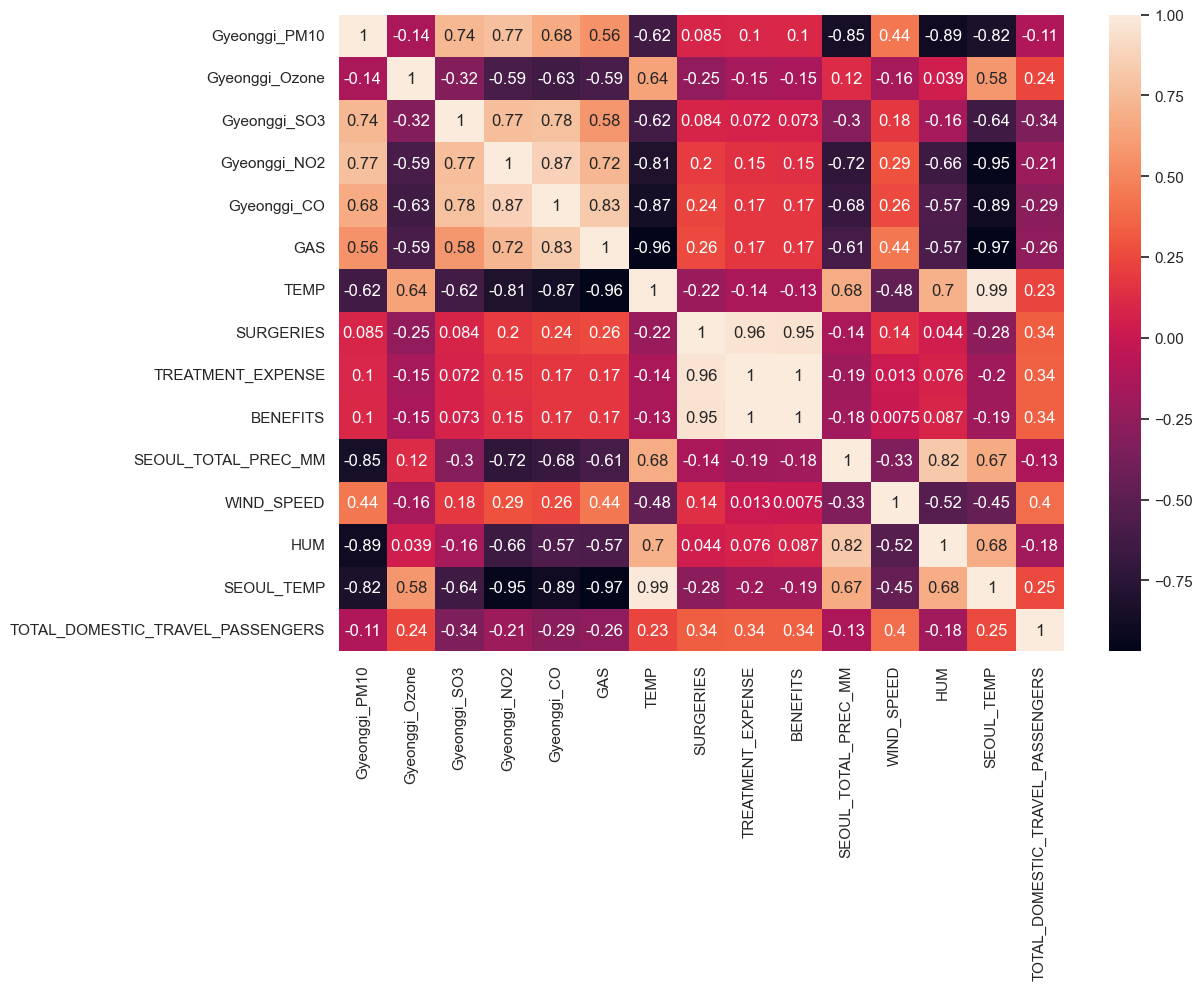

In [97]:
additional_info = pollutants_gyeonggi.copy()
additional_info['SURGERIES'] = abcd.iloc[:,0].diff()
additional_info['TREATMENT_EXPENSE'] = abcd.iloc[:,1].diff()
additional_info['BENEFITS'] = abcd.iloc[:,2].diff()
additional_info['SEOUL_TOTAL_PREC_MM'] = efgh.iloc[:,1]
additional_info['WIND_SPEED'] = efgh.iloc[:,2]
additional_info['HUM'] = efgh.iloc[:,3]
additional_info['SEOUL_TEMP'] = efgh.iloc[:,4]
additional_info['TOTAL_DOMESTIC_TRAVEL_PASSENGERS'] = ijkl.iloc[:,2]
sns.heatmap(additional_info.corr(), annot=True);

## Final note (for now):
Personally, I think the additional weather data (maybe other than wind speed) seem like strong features to include, but aren't necessarily an impactful feature like we discussed. Travel data could be interesting, but the available data is a bit messy and non-regional. Surgeries (and related information) are interesting in regards to each other, but might not be that good of a fit for this project. Infectious disease would be very interesting, but actually predicting it using this data may prove difficult. Drug information could be related to surgery data.
<br><br>
Look into including annual data?